<center><h2> Strategic Analysis and Marketing Optimization for Cardio Good Fitness Treadmill Products </h2></center>

### Import the necessary packages

In [356]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [357]:
data=pd.read_csv("CardioGoodFitness.csv")

In [358]:
# copying data to another varaible to avoid any changes to original data
cardio=data.copy()

### View the first and last 5 rows of the dataset.

In [359]:
cardio.head()       # first 5 rows

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [360]:
#For  Displaying last 5 rows
cardio.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


### Understand the shape of the dataset.

In [361]:
# For Displaying the shape
print(cardio.shape)

(180, 9)


There are 180 rows in the dataset with 9 features

### Check the data types of the columns for the dataset.

In [362]:
# For Displaying the data types of the columns
print(cardio.dtypes)

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


## Fixing the data types
* All variables are Integer are valid data type except for fitness, it is a rating given by a customer for self-fitness on a scale of 5, it should be treated as a category.


* Product,Gender and Marital Status are of object type, we can change them to categories.

`coverting "objects" to "category" reduces the data space required to store the dataframe`

In [363]:
print("\nMemory usage before conversion:")
cardio.memory_usage(deep=False,index=False)


Memory usage before conversion:


Product          1440
Age              1440
Gender           1440
Education        1440
MaritalStatus    1440
Usage            1440
Fitness          1440
Income           1440
Miles            1440
dtype: int64

All features use up the same memory space. Whether it is numerical or object, memory usage is the same for each feature

* Product,Gender, Marital Status and Fitness have been converted to categories

`we can see that the memory usage has decreased from 12.8KB to 8.3KB`

In [364]:
print(cardio.dtypes)


Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


In [365]:
# Convert 'Product', 'Gender', 'MaritalStatus', and 'Fitness' columns to category data type
cardio['Product'] = cardio['Product'].astype('category')
cardio['Gender'] = cardio['Gender'].astype('category')
cardio['MaritalStatus'] = cardio['MaritalStatus'].astype('category')
cardio['Fitness'] = cardio['Fitness'].astype('category')

# Display the data types and memory usage after conversion
print(cardio.dtypes)


Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness          category
Income              int64
Miles               int64
dtype: object


In [366]:
print("\nMemory usage after conversion:")
cardio.memory_usage(deep=False,index=False)


Memory usage after conversion:


Product           312
Age              1440
Gender            304
Education        1440
MaritalStatus     304
Usage            1440
Fitness           392
Income           1440
Miles            1440
dtype: int64

The category features take up lower memory space than the other features. Total memory usage of this dataframe structure has been reduced

### Give a statistical summary for the dataset.

### Handling Outliers

In [367]:
cardio.describe()

,Age,Education,Usage,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,53719.577778,103.194444
std,6.943498,1.617055,1.084797,16506.684226,51.863605
min,18.000000,12.000000,2.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,104581.000000,360.000000


1. There is slight skewness in the data as seen in different mean and medians.

2. There are no missing values as count is 180 for all features

3. This gives the statistical summary for all numerical features

4. Age, Usage, Income and Miles have mean > median - Right skewness.

5. Education is slightly left skewed

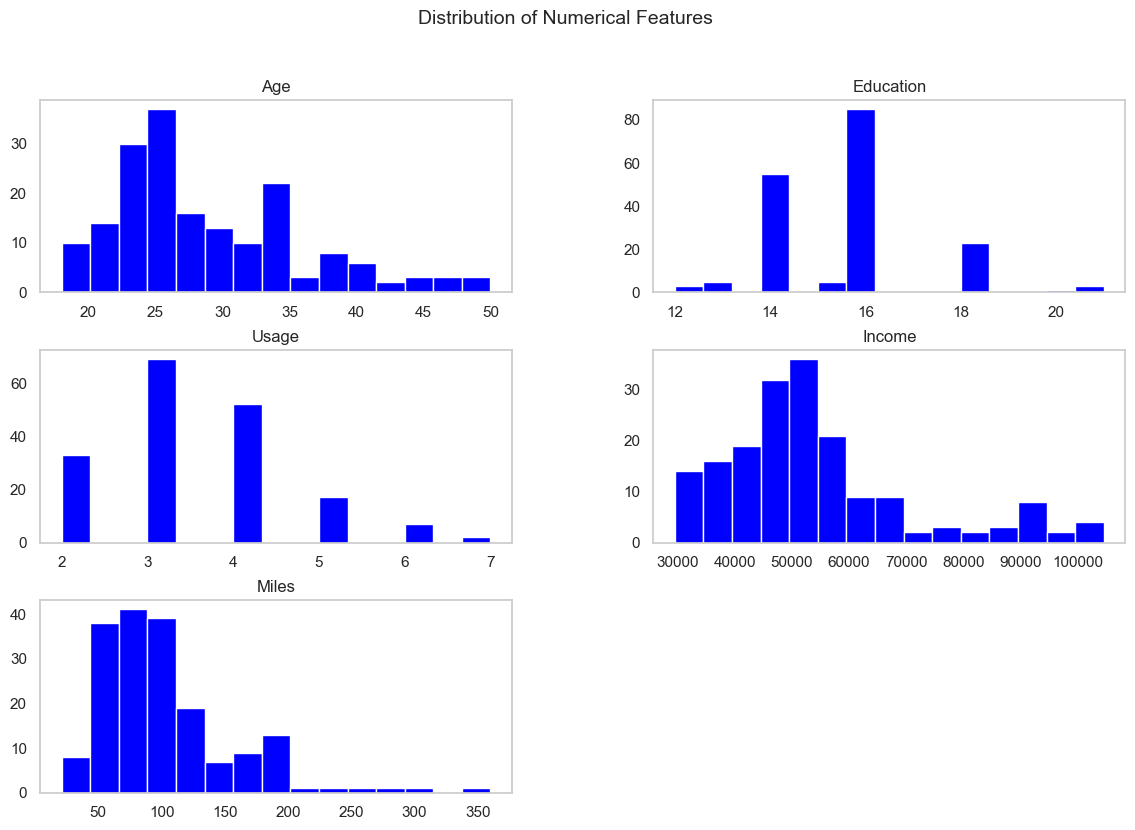

In [368]:
cardio.select_dtypes(exclude='category').hist(bins=15,figsize=(14,9),color='blue',grid=False)
plt.suptitle('Distribution of Numerical Features',fontsize=14)
plt.show()

For this distribution, we can see that Usage is actually a categorical feature

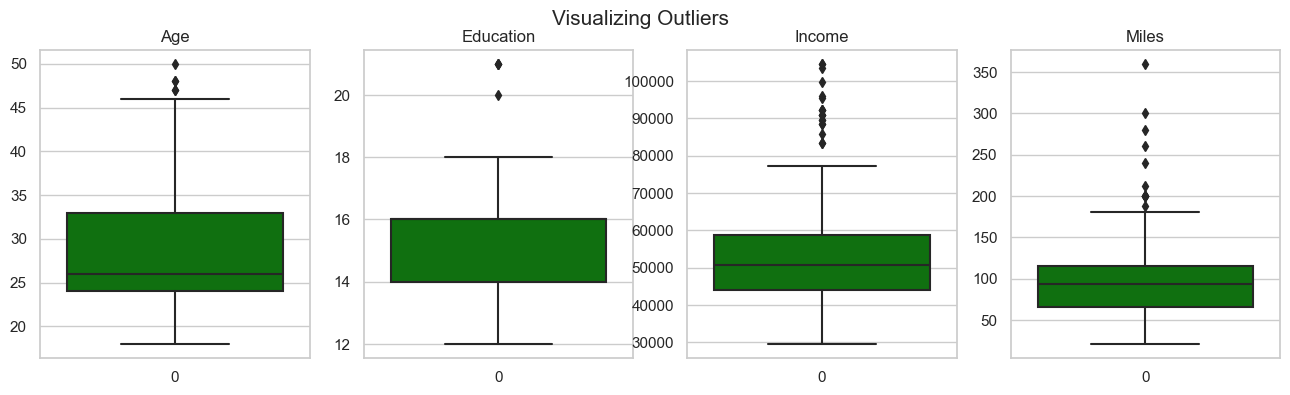

In [369]:
cardio.Usage = cardio.Usage.astype('category')
fig,axs = plt.subplots(1,4,figsize=(16,4))
i=0
for clmns in cardio.select_dtypes(exclude='category').columns.tolist():
    sns.boxplot(cardio[clmns],ax=axs[i],color='green')
    axs[i].set_title(clmns)
    plt.suptitle('Visualizing Outliers',fontsize=15)
    i+=1

All numerical features have outliers as predicted from the descriptive table. Handling these outliers by replacing them with the upper limit.

Upper limit = Q3 + 1.5 * IQR


In [370]:

# Loop through each column of the DataFrame
for clmn in cardio.select_dtypes(exclude=['category']).columns.tolist():
    Q1 = cardio[clmn].quantile(0.25)
    Q3 = cardio[clmn].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR

    # Replace outliers with the upper limit
    cardio[clmn] = np.where(cardio[clmn] > upper_limit, upper_limit, cardio[clmn])


All outliers causing the skewness have been removed. Let's move onto categorical summary.

In [371]:
# Display a statistical summary for the dataset
cardio.describe(include='category')


,Product,Gender,MaritalStatus,Usage,Fitness
count,180,180,180,180,180
unique,3,2,2,6,5
top,TM195,Male,Partnered,3,3
freq,80,104,107,69,97


1. No missing values in the data.

2. There are 3 types of unique treadmills with TM195 having the most sales.

3. Mostly males purchase the treadmill.

4. Married customers purchase the treadmills more than singles

5. 3 times is the most common usage for those having a treadmill

6. Most customers rate themselves as a 3 on a scale of 1 to 5 in fitness levels

### Check for missing values

In [372]:
# Check for missing values in the dataset
missing_values = cardio.isnull().sum()

# Display the count of missing values for each column
missing_values


Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

* There are no missing values in the data. as we saw earlier

### EDA

### Univariate analysis

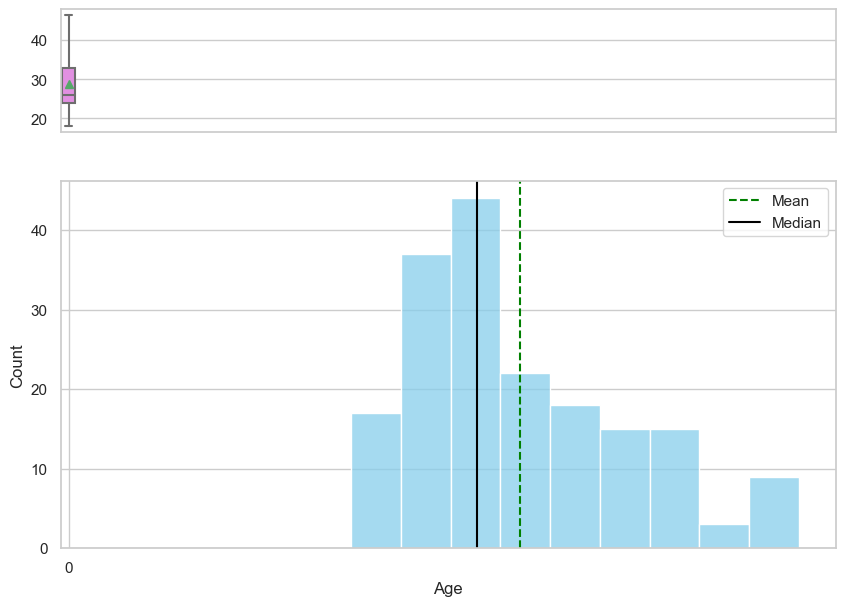

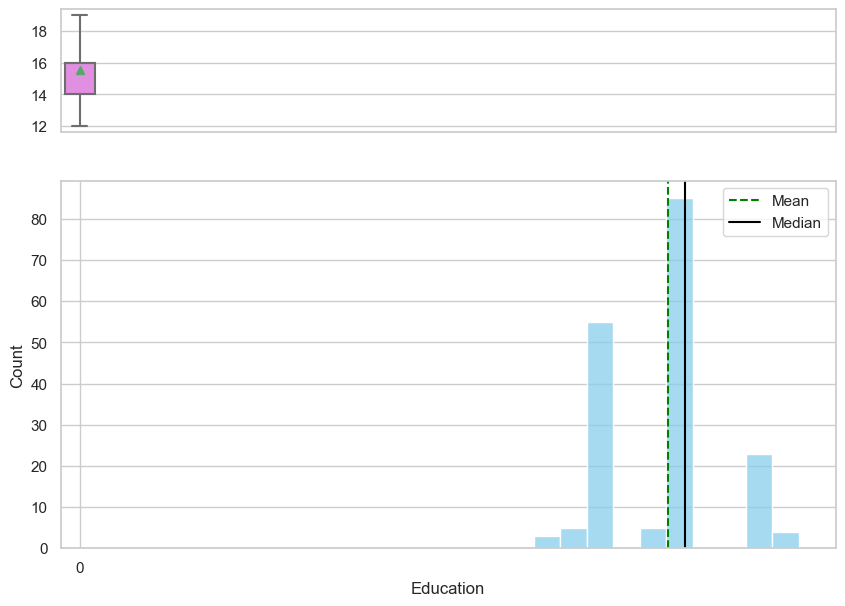

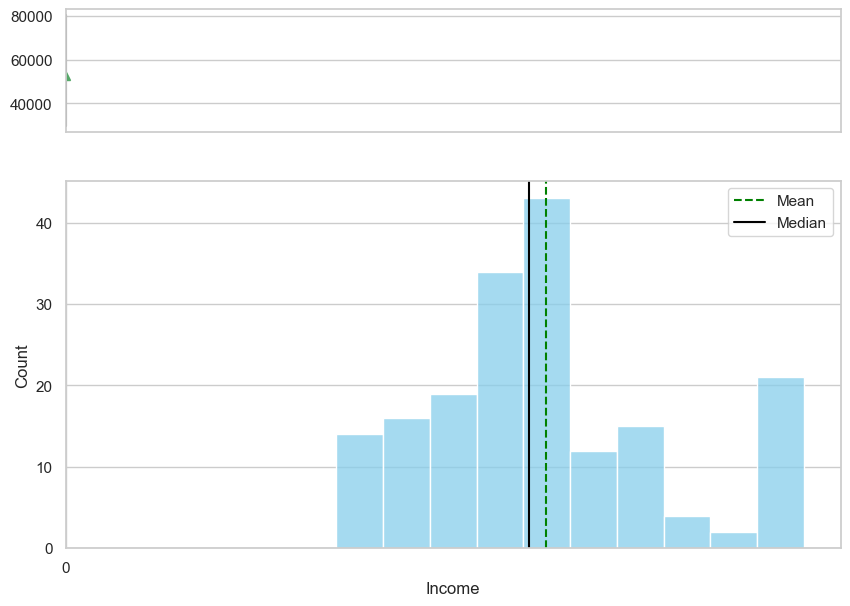

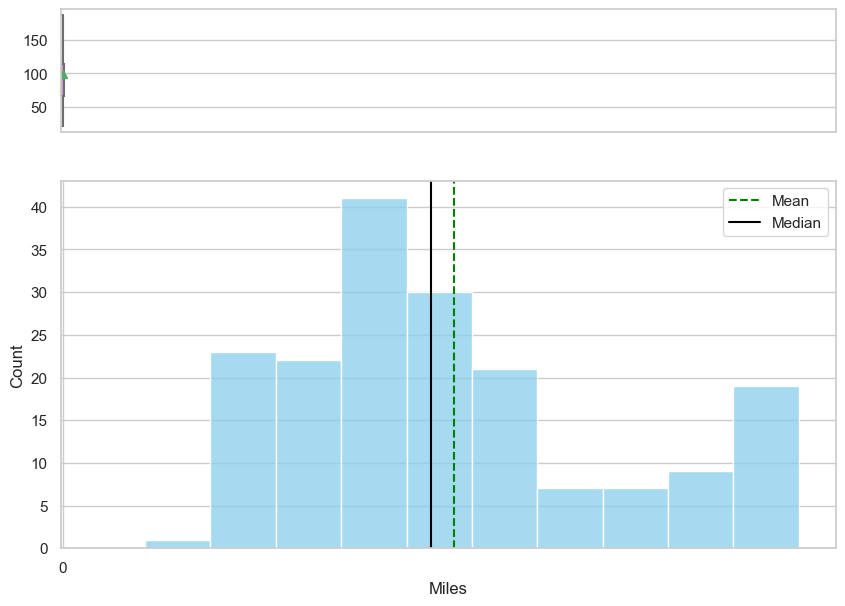

In [373]:

def histogram_boxplot(feature, figsize=(10, 7), bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2,  # Number of rows of the subplot grid= 2
                                           sharex=True,  # x-axis will be shared among all subplots
                                           gridspec_kw={"height_ratios": (.25, .75)},
                                           figsize=figsize
                                           )  # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet')  # boxplot with mean indicator
    sns.histplot(feature, kde=False, bins=bins, color='skyblue', ax=ax_hist2) if bins else sns.histplot(feature, kde=False, color='skyblue', ax=ax_hist2)  # Histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--', label='Mean')  # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-', label='Median')  # Add median to the histogram
    ax_hist2.legend()  # Show legend

# Numerical columns : AGE, USAGE , EDUCATION, INCOME, MILES
histogram_boxplot(cardio['Age'])
# histogram_boxplot(cardio['Usage'])
histogram_boxplot(cardio['Education'])
histogram_boxplot(cardio['Income'])
histogram_boxplot(cardio['Miles'])
plt.show()



#### Observations
##### AGE
- Histogram: The x-axis represents age, and the y-axis represents the count of individuals within each age bin. The histogram shows that the most common age range is between the late 20s to early 30s, with the frequency gradually decreasing for higher ages.

- Box Plot: The box plot at the top provides a summary of the distribution of ages

##### Education
- The solid line represents the median of the data, which is the middle value when the data is ordered from smallest to largest. In this histogram, the median appears to be at 16 years of education.

- The dashed line represents the mean of the data, which is the arithmetic average of all the data points. The mean is also very close to 16 years of education, slightly higher than the median, indicating that the distribution is nearly symmetrical around the central value.

##### Income
- The dashed line represents the mean income, which is the arithmetic average of all the income values.
- The solid line represents the median income, which is the middle value when all the income amounts are arranged in order.

##### Miles
- The histogram itself shows the frequency of different ranges of miles, with the height of each bar corresponding to the number of occurrences in that range. The exact numerical values for the mean and median cannot be determined from the image alone without the scale values on the x-axis. However, the mean appears to be slightly higher than the median, indicating a right-skewed distribution.

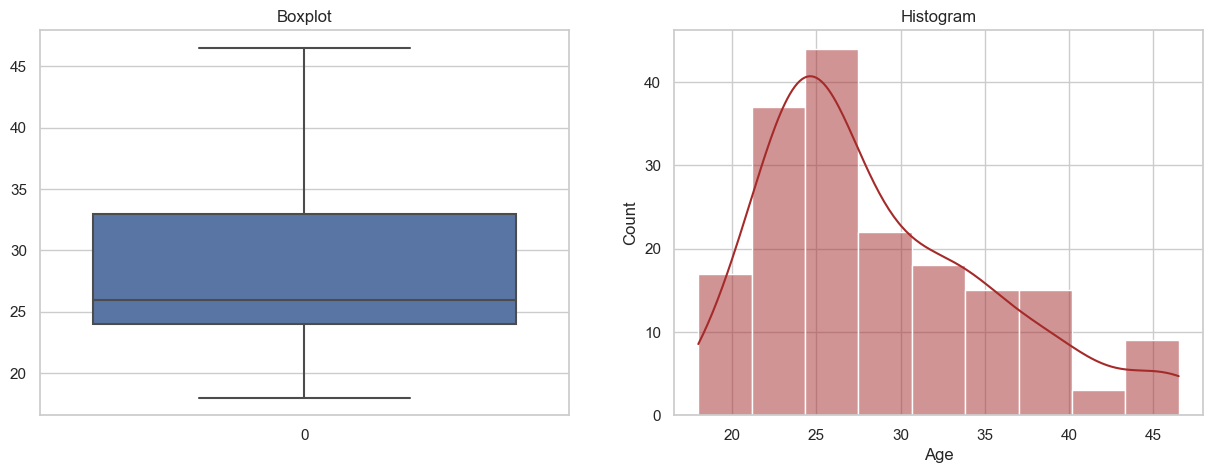

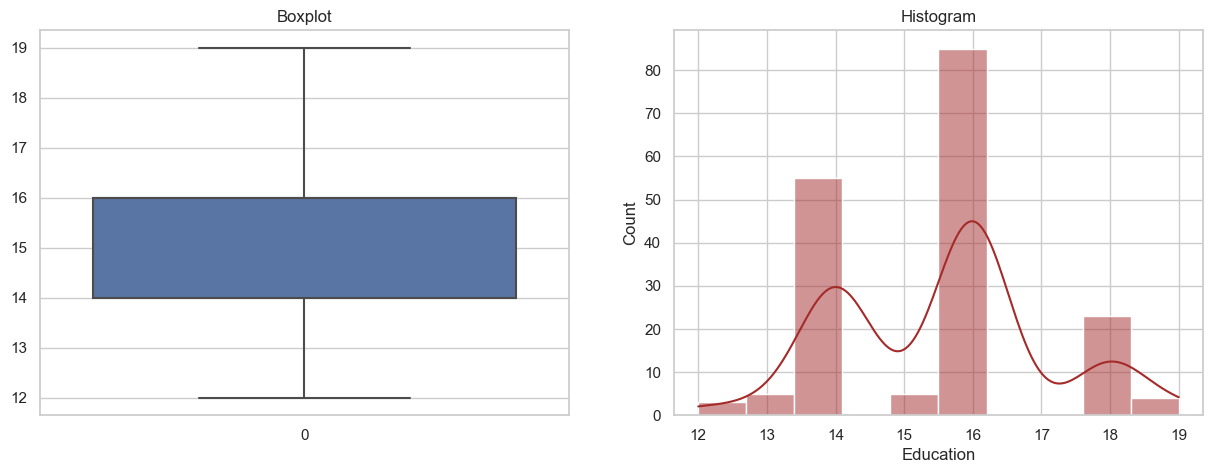

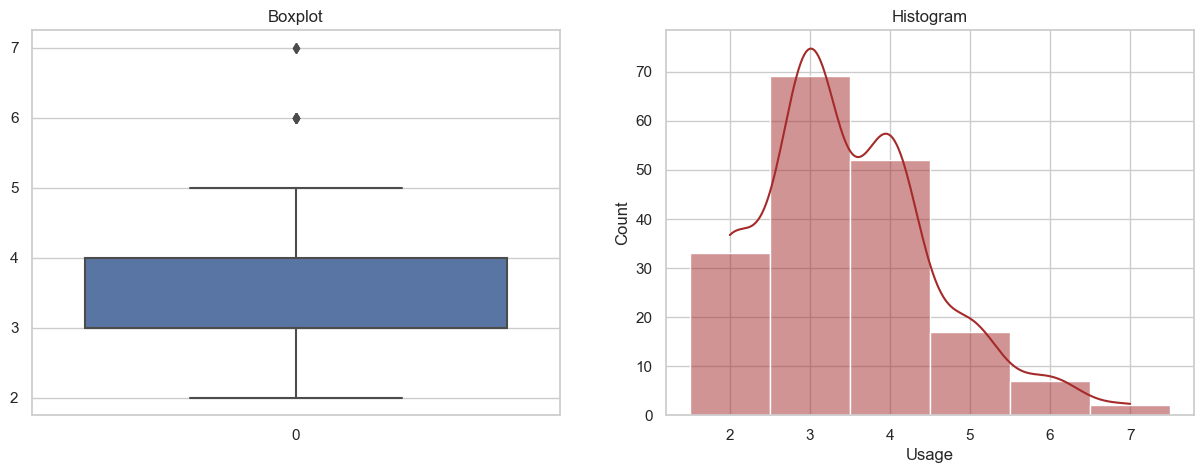

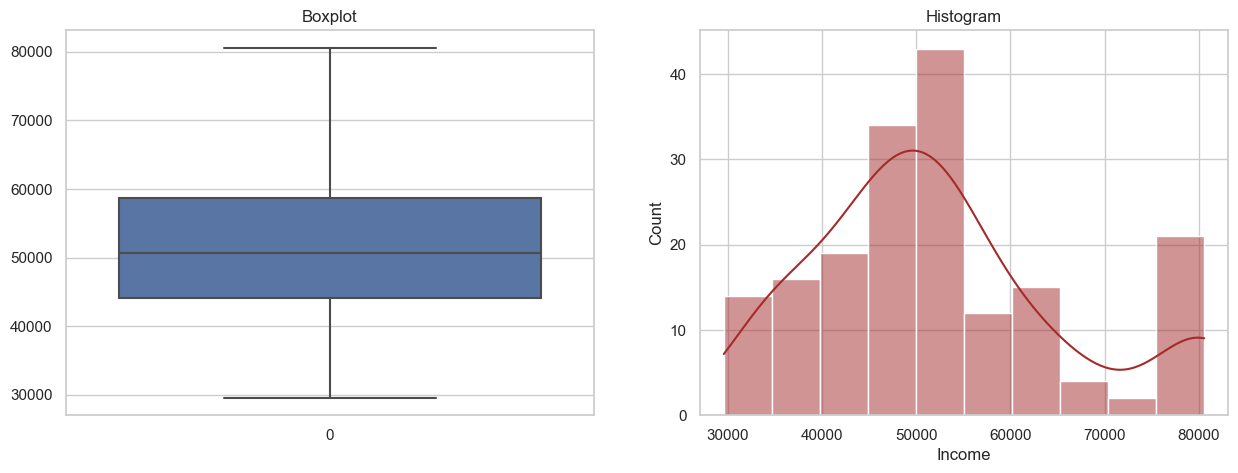

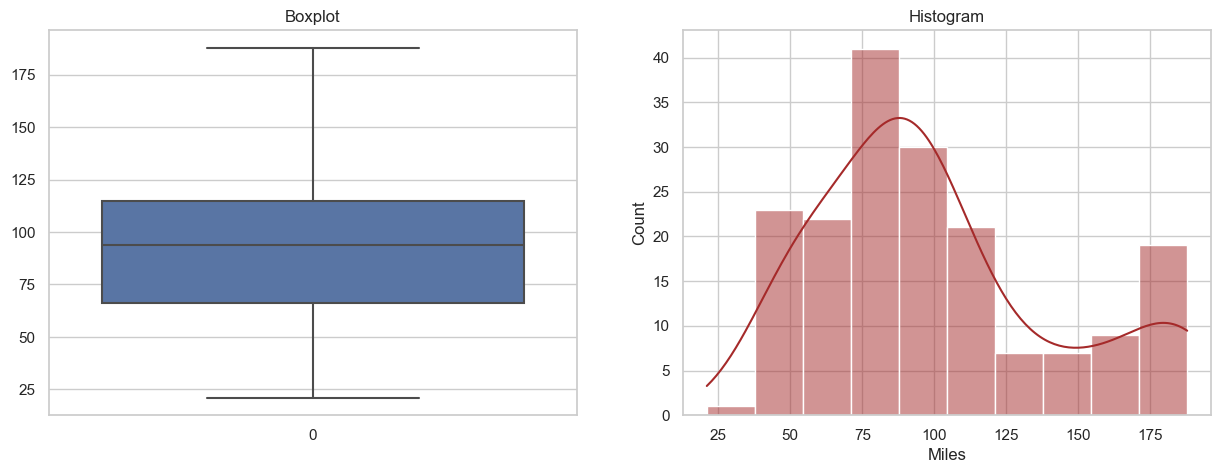

In [374]:


def plot_numerical_variable(column, figsize=(15, 5)):
    """
    Create boxplot and histogram for a numerical variable.

    Parameters:
    - column: pandas Series, the numerical variable to be analyzed.
    - figsize: tuple, optional, size of the figure (default is (15, 5)).
    """
    # Set up the figure with subplots
    fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=figsize)

    #For  Plotting  boxplot
    sns.boxplot(column, ax=ax_box)
    ax_box.set_title('Boxplot')

    # For  Plotting histogram
    sns.histplot(column, kde=True, color='brown', ax=ax_hist)
    ax_hist.set_title('Histogram')
    plt.show()


# Numerical columns in our dataset are: AGE, EDUCATION, USAGE, INCOME, MILES
plot_numerical_variable(cardio['Age'])
plot_numerical_variable(cardio['Education'])
plot_numerical_variable(cardio['Usage'])
plot_numerical_variable(cardio['Income'])
plot_numerical_variable(cardio['Miles'])



#### Observations 

##### Age 
- The histogram represents the variable 'Age' and shows a distribution that peaks around 25 years old, with the frequency decreasing for higher ages.

##### Education
- The histogram represents the variable 'Education' and shows a distribution with the highest frequency at 16 years of education, suggesting that this is the most common education level in the dataset.

##### Usage
- The histogram bars show the actual count of observations for each usage frequency, with the tallest bar at usage frequency 3, suggesting that this is the most common usage frequency among the observations.

##### Income
- The histogram bars show the frequency of observations for different income ranges. The tallest bar is in the 40,000 to 50,000 range, suggesting that this is the most common income range in the dataset.
- The red curve represents the kernel density estimate, which provides a smooth approximation of the income distribution.

##### Miles
- The x-axis, labeled 'Miles', shows the range of miles that the data spans, with markings at intervals of 25 starting from 25 up to 175. The histogram bars indicate the frequency of observations for each bin, with the highest frequency occurring in the 75-100 miles range.

## Observations on Age

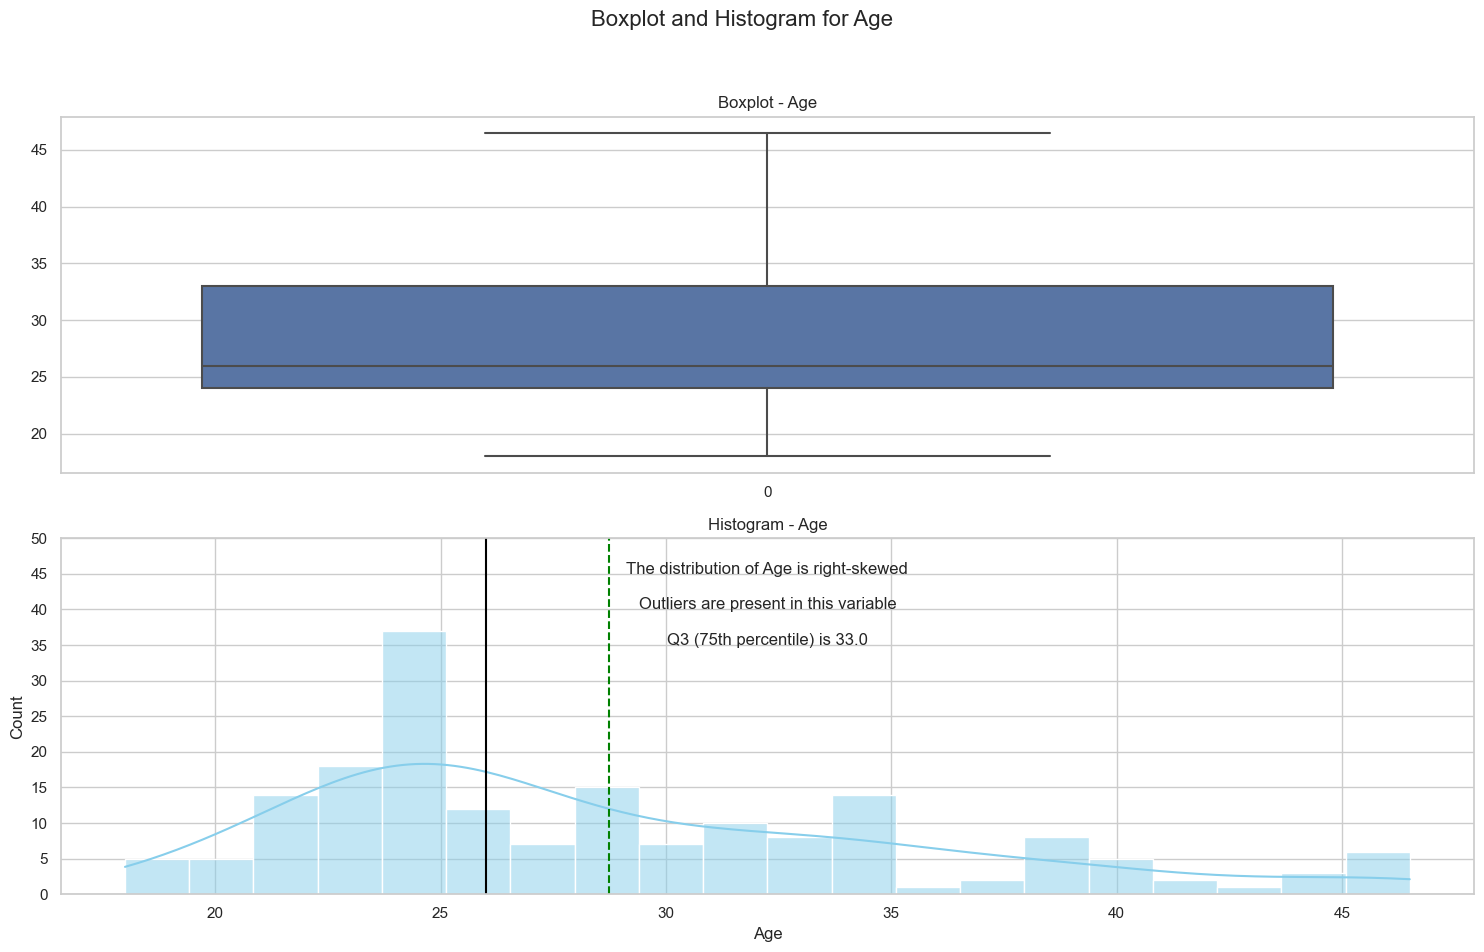

In [375]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
fig.suptitle('Boxplot and Histogram for Age', fontsize=16)

# Boxplot (Age)
sns.boxplot(cardio['Age'], ax=axes[0])
axes[0].set_title('Boxplot - Age')

# Histogram (Age)
sns.histplot(cardio['Age'], kde=True, bins=20, color='skyblue', ax=axes[1])
axes[1].set_title('Histogram - Age')

# Adding mean and median lines to histogram
axes[1].axvline(np.mean(cardio['Age']), color='green', linestyle='--', label='Mean')
axes[1].axvline(np.median(cardio['Age']), color='black', linestyle='-', label='Median')

# Add observations
axes[1].text(0.5, 0.9, "The distribution of Age is right-skewed", transform=axes[1].transAxes, ha='center')
axes[1].text(0.5, 0.8, "Outliers are present in this variable", transform=axes[1].transAxes, ha='center')
axes[1].text(0.5, 0.7, f"Q3 (75th percentile) is {np.percentile(cardio['Age'], 75)}", transform=axes[1].transAxes, ha='center')

# Set custom y-axis limits for histogram
axes[1].set_ylim(0, 50)
axes[1].set_yticks(range(0, 51, 5))
axes[1].set_yticklabels([str(i) for i in range(0, 51, 5)])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Observations

- Boxplot - Age: This graph shows the spread of the age data. The box represents the interquartile range (IQR), with the bottom and top edges representing the first (Q1) and third (Q3) quartiles, respectively. The line inside the box indicates the median. The "whiskers" extend to the smallest and largest values within 1.5 times the IQR from the Q1 and Q3. Any data points outside this range are considered outliers and are represented as individual points beyond the whiskers.

- Histogram - Age: This graph shows the frequency distribution of ages. Each bar represents the count of individuals within a specific age range. The histogram also includes a dashed green line indicating the third quartile (Q3) at 33 years of age, which means that 75% of the data falls below this age. The note on the graph states that the distribution of age is right-skewed, which is also visually evident from the histogram's shape, with a tail extending towards the older ages.

- The distribution of Age is right-skewed.
- There are outliers in this variable.
- From the boxplot, we can see that the third quartile (Q3) is equal to 33, which means 75% of customers are below the age of 33.

## Observations on Education

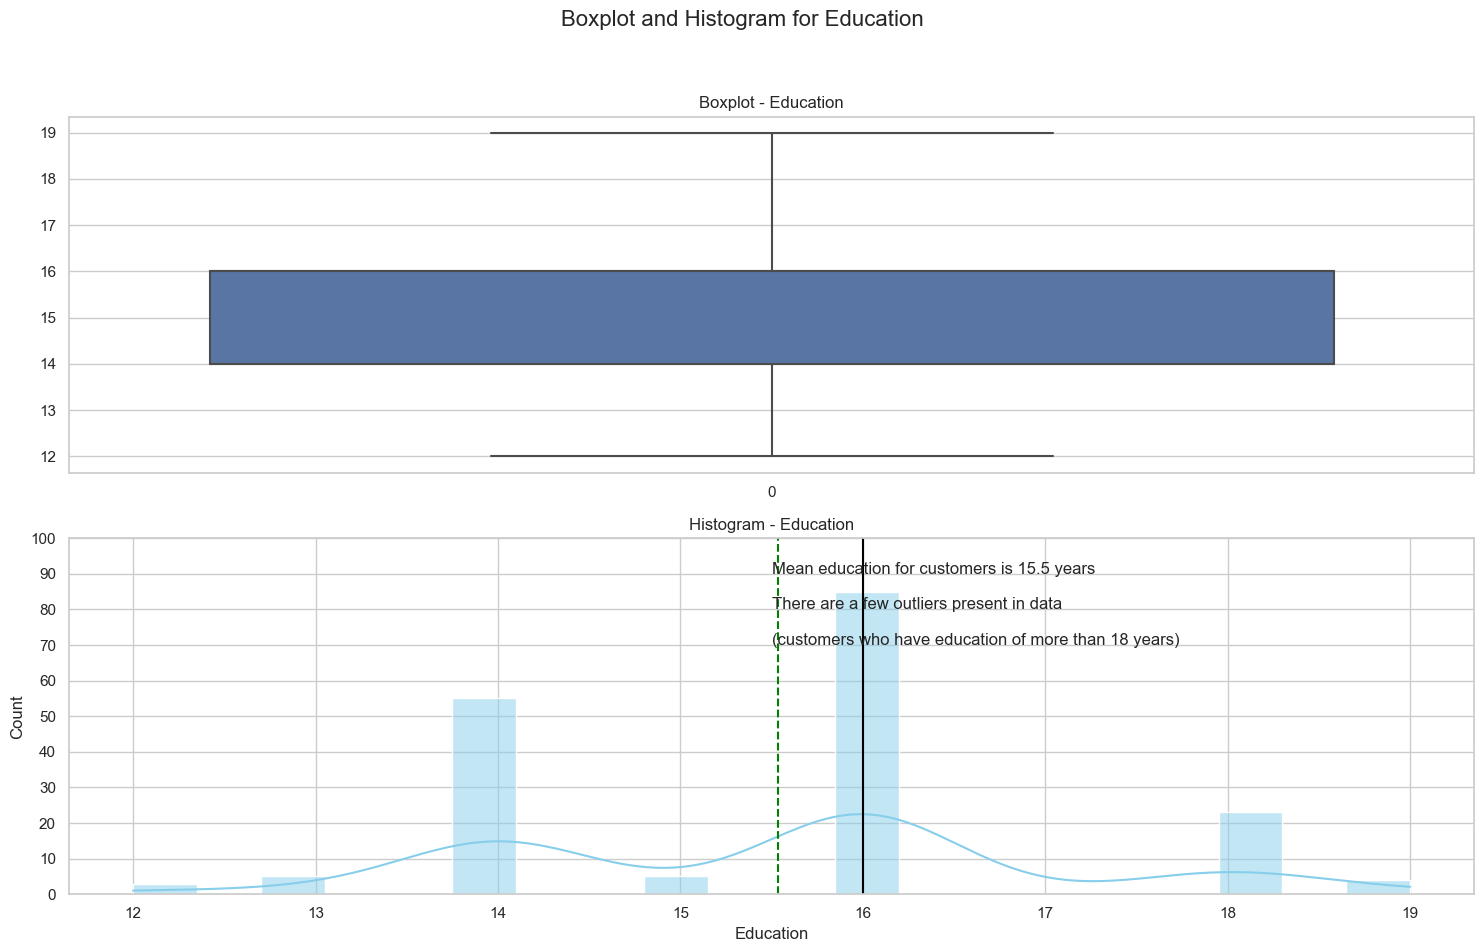

In [376]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
fig.suptitle('Boxplot and Histogram for Education', fontsize=16)

# Boxplot for Education
sns.boxplot(cardio['Education'], ax=axes[0])
axes[0].set_title('Boxplot - Education')

# Histogram for Education
sns.histplot(cardio['Education'], kde=True, bins=20, color='skyblue', ax=axes[1])
axes[1].set_title('Histogram - Education')

# Add mean and median lines to histogram
axes[1].axvline(np.mean(cardio['Education']), color='green', linestyle='--', label='Mean')
axes[1].axvline(np.median(cardio['Education']), color='black', linestyle='-', label='Median')

# Add observations
axes[1].text(0.5, 0.9, f"Mean education for customers is {np.mean(cardio['Education']):.1f} years", transform=axes[1].transAxes, ha='left')
axes[1].text(0.5, 0.8, "There are a few outliers present in data", transform=axes[1].transAxes, ha='left')
axes[1].text(0.5, 0.7, "(customers who have education of more than 18 years)", transform=axes[1].transAxes, ha='left')

# Set custom y-axis limits for histogram
axes[1].set_ylim(0, 50)
axes[1].set_yticks(range(0, 101, 10))
axes[1].set_yticklabels([str(i) for i in range(0, 101, 10)])

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Observations

- Boxplot - Education: This graph shows the spread of the education data. The box represents the interquartile range (IQR), with the bottom and top edges representing the first (Q1) and third (Q3) quartiles, respectively. The line inside the box indicates the median. The "whiskers" extend to the smallest and largest values within 1.5 times the IQR from the Q1 and Q3. Any data points outside this range are considered outliers and are represented as individual points beyond the whiskers.

- Histogram - Education: This graph shows the frequency distribution of education levels. Each bar represents the count of individuals within a specific range of education years. The histogram also includes a dashed green line indicating the mean education level for customers, which is noted as 15.5 years.

- Mean education for customers is 15.5 years.
- There are a few outliers present in data (customers who have education of more than 18 years).

## Observations on Usage

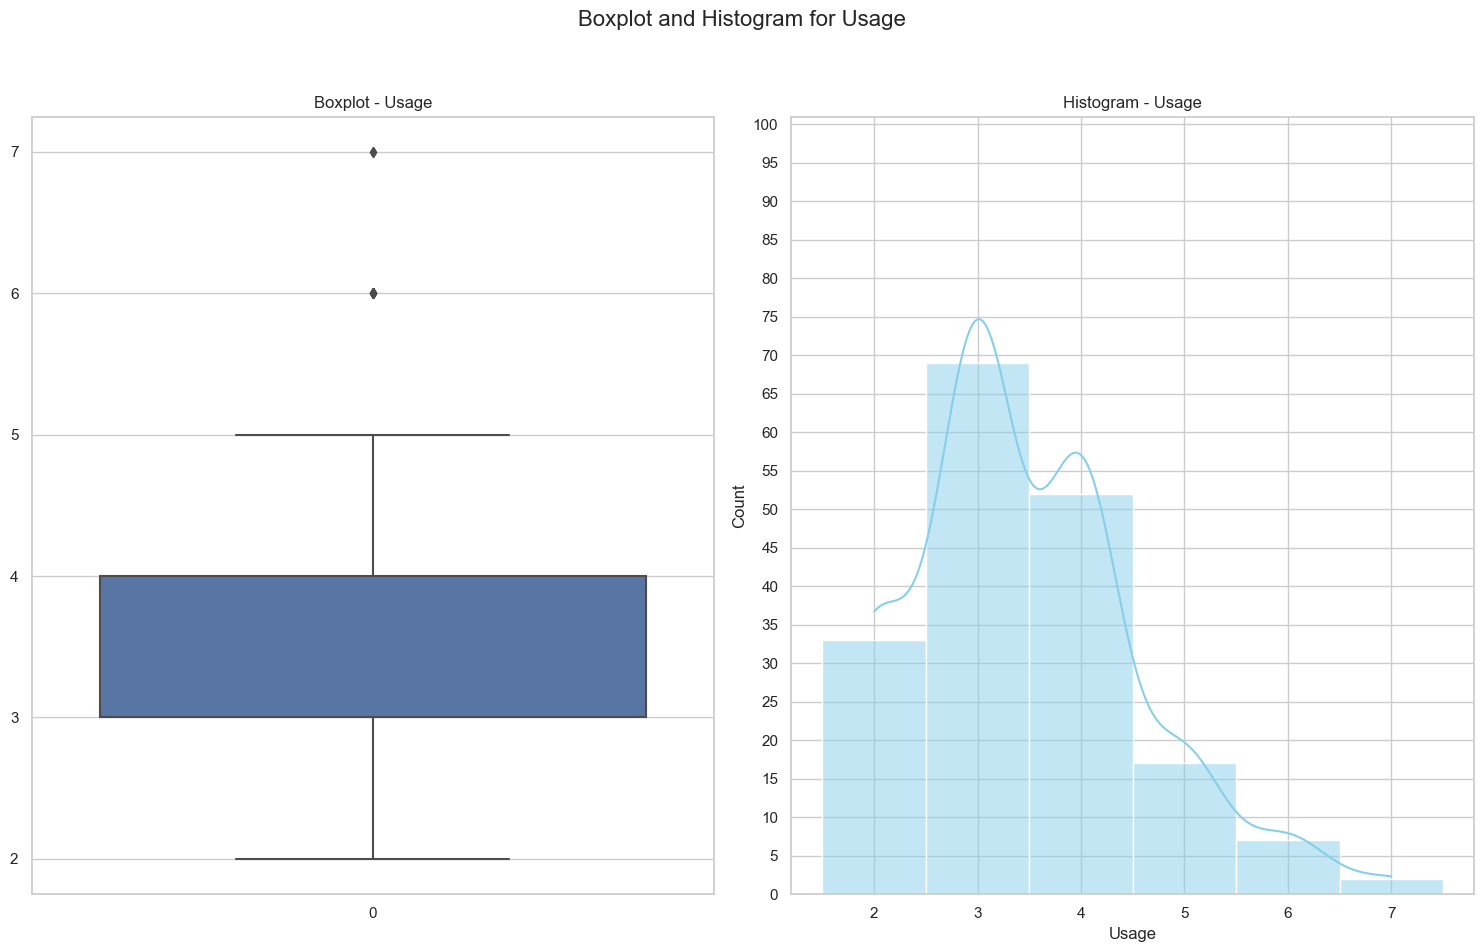

In [377]:
#Usage plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
fig.suptitle('Boxplot and Histogram for Usage', fontsize=16)
sns.boxplot(cardio['Usage'], ax=axes[0])
axes[0].set_title('Boxplot - Usage')

# Histogram for Usage
sns.histplot(cardio['Usage'], kde=True, bins=20, color='skyblue', ax=axes[1])
axes[1].set_title('Histogram - Usage')
axes[1].set_ylim(0, 101)
axes[1].set_yticks(range(0, 101, 5))
axes[1].set_yticklabels([str(i) for i in range(0, 101, 5)])

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Observations
- Boxplot - Usage: The boxplot shows the interquartile range (IQR) of the data, with the box extending from the first quartile (Q1) to the third quartile (Q3), representing the middle 50% of the data. The median is indicated by the line within the box. The "whiskers" extend to the smallest and largest values within 1.5 times the IQR from the Q1 and Q3. Points outside this range are considered outliers, depicted as individual dots; there are outliers at usage levels 6 and 7.

- Histogram - Usage: The histogram shows the distribution of the 'Usage' data, with the x-axis representing the usage frequency and the y-axis representing the count of occurrences. The histogram is overlaid with a kernel density estimate, which provides a smooth curve representing the data distribution. The distribution peaks around 3-4, indicating that this is the most common usage frequency.

- Customers want to use the treadmills 3-4 times a week on average.
- There are few outliers, customers who wish to use treadmills 6-7 times a week.

## Observations on Income

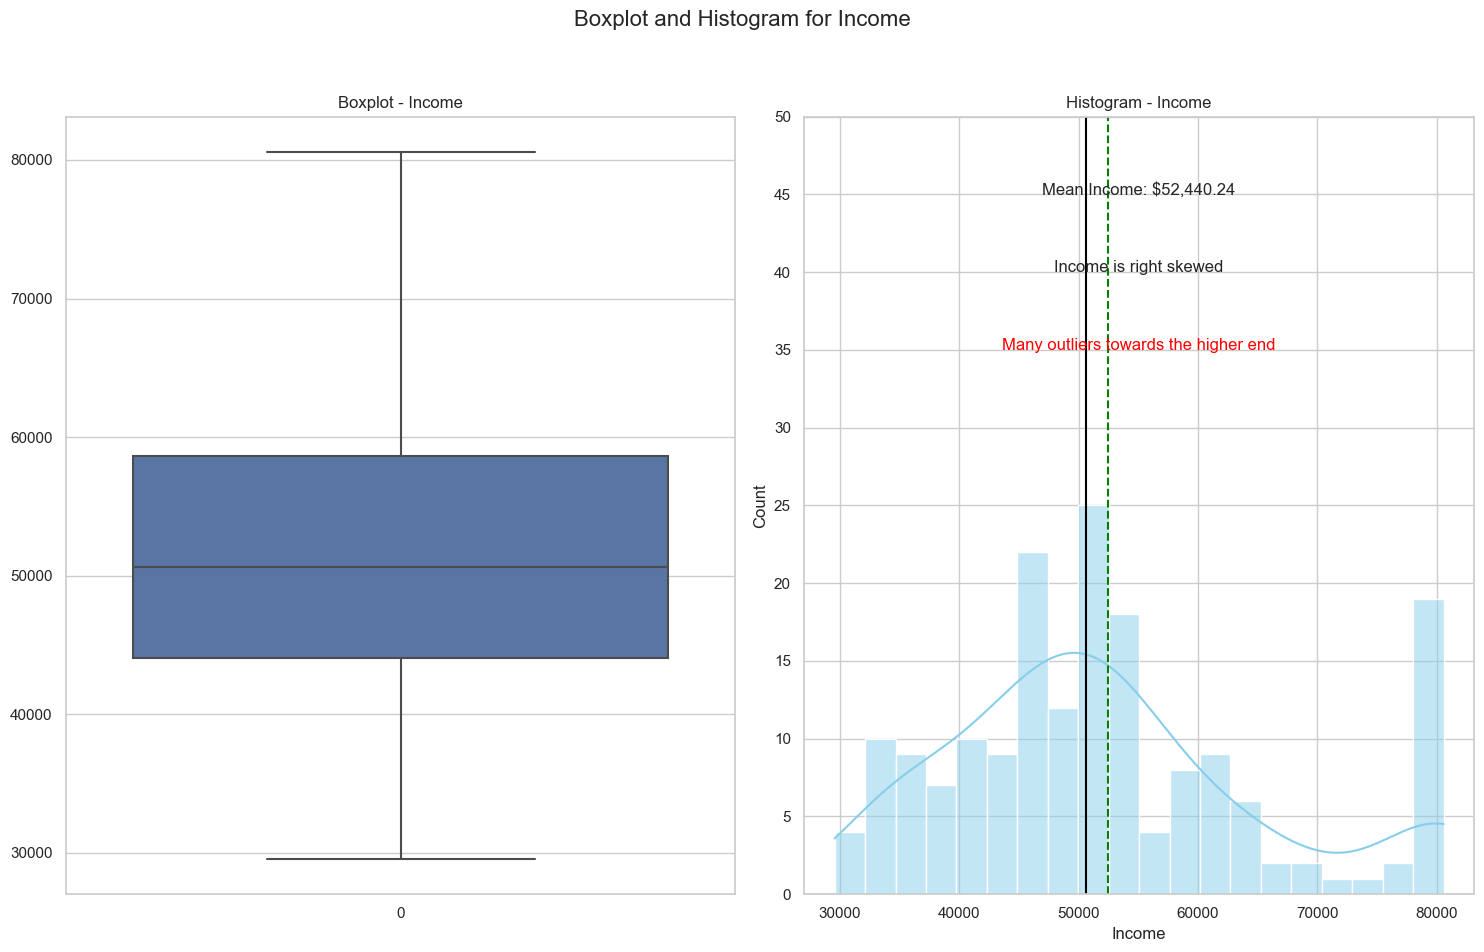

In [378]:
# Plot for Income
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
fig.suptitle('Boxplot and Histogram for Income', fontsize=16)
sns.boxplot(cardio['Income'], ax=axes[0])
axes[0].set_title('Boxplot - Income')
sns.histplot(cardio['Income'], kde=True, bins=20, color='skyblue', ax=axes[1])
axes[1].set_title('Histogram - Income')
# Add mean and median lines to histogram
axes[1].axvline(np.mean(cardio['Income']), color='green', linestyle='--', label='Mean')
axes[1].axvline(np.median(cardio['Income']), color='black', linestyle='-', label='Median')
# Add observations
axes[1].text(0.5, 0.9, f"Mean Income: ${np.mean(cardio['Income']):,.2f}", transform=axes[1].transAxes, ha='center')
axes[1].text(0.5, 0.8, "Income is right skewed", transform=axes[1].transAxes, ha='center')
axes[1].text(0.5, 0.7, "Many outliers towards the higher end", transform=axes[1].transAxes, ha='center', color='red')
# Set custom y-axis limits for histogram
axes[1].set_ylim(0, 50)
axes[1].set_yticks(range(0, 51, 5))
axes[1].set_yticklabels([str(i) for i in range(0, 51, 5)])
# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Observations

- Boxplot - Income: The boxplot indicates the median income is around the mid-point of the box, which is approximately $55,000. The box represents the interquartile range (IQR), showing the middle 50% of the data. The whiskers extend to the minimum and maximum values that are not considered outliers. There are no visible outliers in the boxplot, which suggests that all data points fall within a reasonable range of the IQR.

- Histogram - Income: The histogram shows the distribution of income across different bins. The distribution is right-skewed, as indicated by the longer tail on the right side of the histogram. This skewness is also noted below the graph. A dashed green line indicates the mean income, which is labeled as $52,440.24. The skewness means that the mean is pulled to the right by higher income values.

- Mean income of customers who bought a treadmill is around $55,000.
- Income is right-skewed.
- It has many outliers towards the higher end.

## Observations on Miles

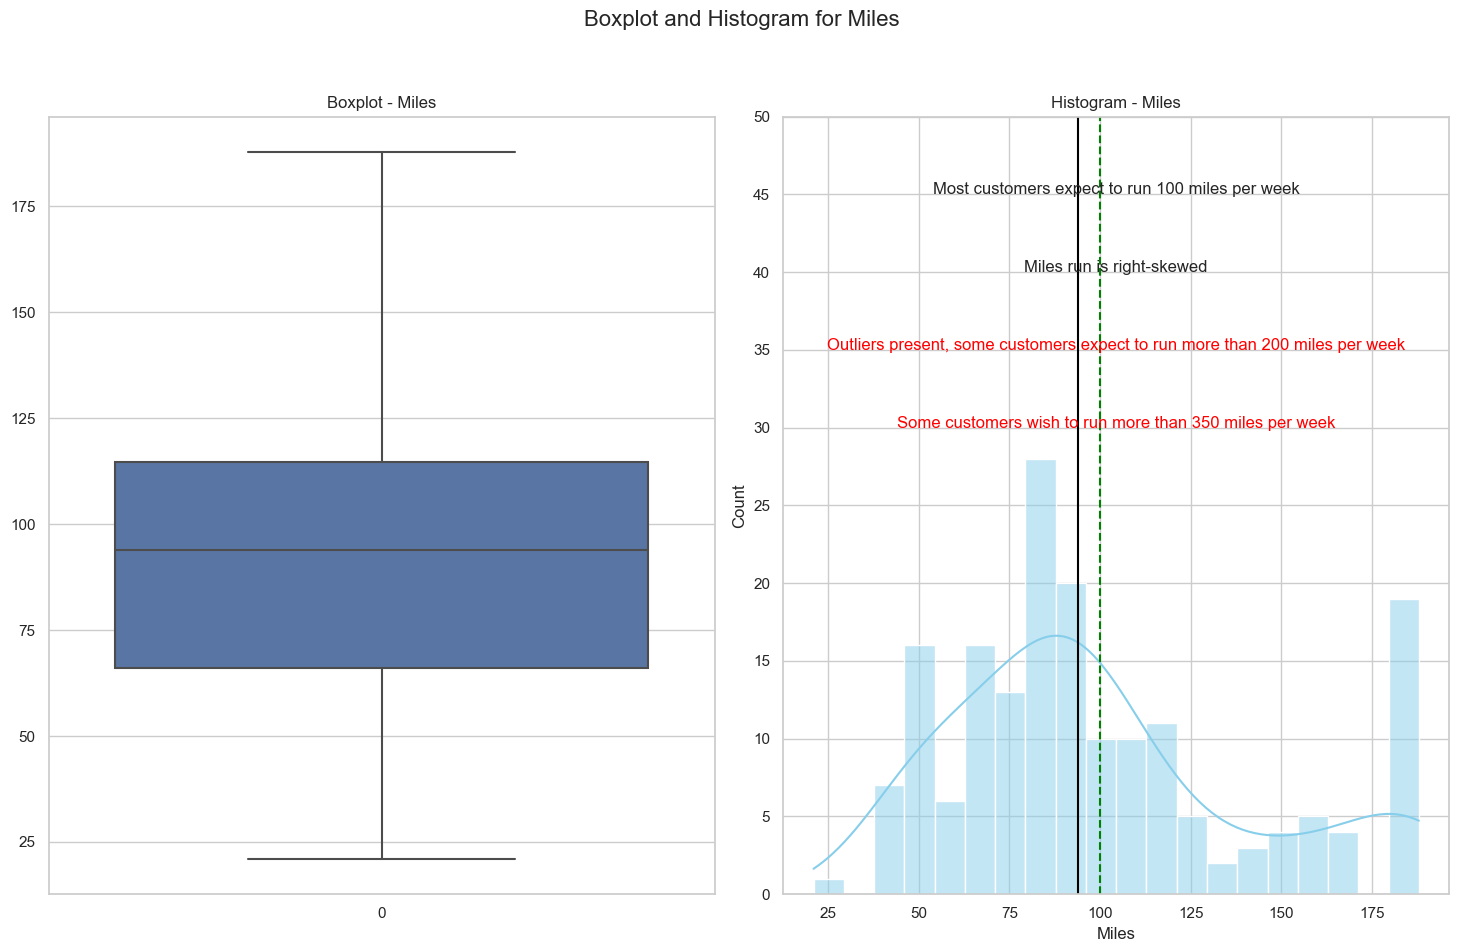

In [379]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
fig.suptitle('Boxplot and Histogram for Miles', fontsize=16)
# Boxplot for Miles
sns.boxplot(cardio['Miles'], ax=axes[0])
axes[0].set_title('Boxplot - Miles')
# Histogram for Miles
sns.histplot(cardio['Miles'], kde=True, bins=20, color='skyblue', ax=axes[1])
axes[1].set_title('Histogram - Miles')
# Add mean and median lines to histogram
axes[1].axvline(np.mean(cardio['Miles']), color='green', linestyle='--', label='Mean')
axes[1].axvline(np.median(cardio['Miles']), color='black', linestyle='-', label='Median')
# Add observations
axes[1].text(0.5, 0.9, f"Most customers expect to run 100 miles per week", transform=axes[1].transAxes, ha='center')
axes[1].text(0.5, 0.8, "Miles run is right-skewed", transform=axes[1].transAxes, ha='center')
axes[1].text(0.5, 0.7, "Outliers present, some customers expect to run more than 200 miles per week", transform=axes[1].transAxes, ha='center', color='red')
axes[1].text(0.5, 0.6, "Some customers wish to run more than 350 miles per week", transform=axes[1].transAxes, ha='center', color='red')
# Set custom y-axis limits for histogram
axes[1].set_ylim(0, 50)
axes[1].set_yticks(range(0, 51, 5))
axes[1].set_yticklabels([str(i) for i in range(0, 51, 5)])
# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Observations

- Boxplot - Miles: The boxplot provides a visual summary of the distribution of miles run by customers. The box represents the interquartile range (IQR), showing the middle 50% of the data. The line within the box indicates the median. The whiskers extend to the smallest and largest values within 1.5 times the IQR from the first and third quartiles. There are no visible outliers in the boxplot, which suggests that all data points fall within a reasonable range of the IQR.

- Histogram - Miles: The histogram shows the distribution of miles run by customers, with the x-axis representing the number of miles and the y-axis representing the count of occurrences. The histogram is overlaid with a kernel density estimate, which provides a smooth curve representing the data distribution. The distribution has a peak around 100 miles, indicating that this is the most common distance run by customers.

- Most customers expect to run 100 miles per week.
- Miles run is right-skewed.
- There are outliers present, some customers expect to run more than 200 miles per week, some customers wish to run more than 350 miles per week this could be an error in data collection or any professional runner bought the product.

## Observations on Product

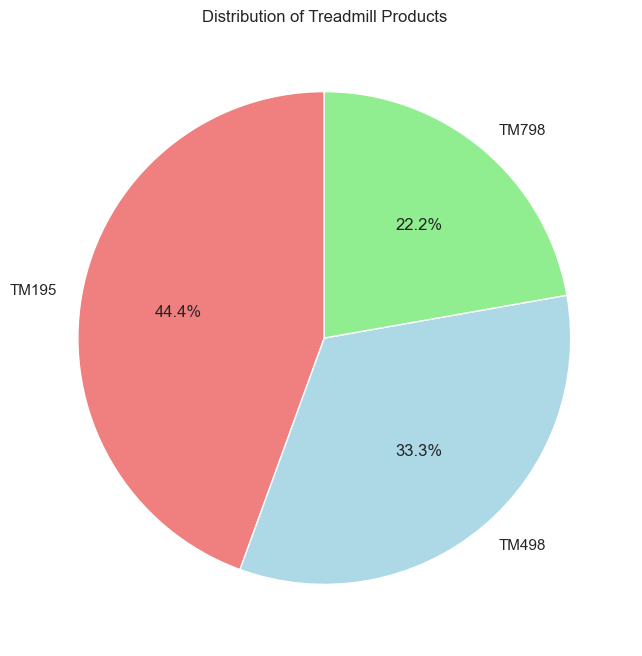

In [380]:
# Calculate the percentage of each product
product_percentage = cardio['Product'].value_counts(normalize=True) * 100
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(product_percentage, labels=product_percentage.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Distribution of Treadmill Products')
plt.show()


#### Obserations

- The TM195 product has the largest portion of the pie chart, colored in red, representing 44.4% of total sales.
- The TM498 product is the next largest segment, colored in blue, representing 33.3% of sales.
- The TM798 product has the smallest portion, colored in green, representing 22.2% of sales.
- The highest selling product is TM195 (44.4%), followed by TM498 (33.3%) and TM798 (22.2%).

## Observations on Gender

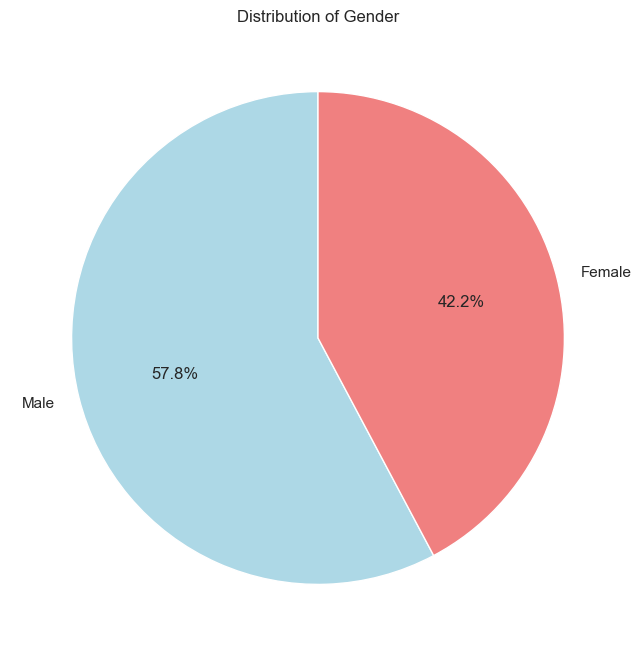

In [381]:
# Plotting the pie chart for gender distribution
plt.figure(figsize=(8, 8))
cardio['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Distribution of Gender')
plt.ylabel('')
plt.show()


#### Obsevations

- The larger segment, colored in blue, represents Male customers, accounting for 57.8% of the total.
- The smaller segment, colored in red, represents Female customers, accounting for 42.2% of the total.
- There are more male customers (57.8%) than female customers (42.2%).

## Observations on Marital Status

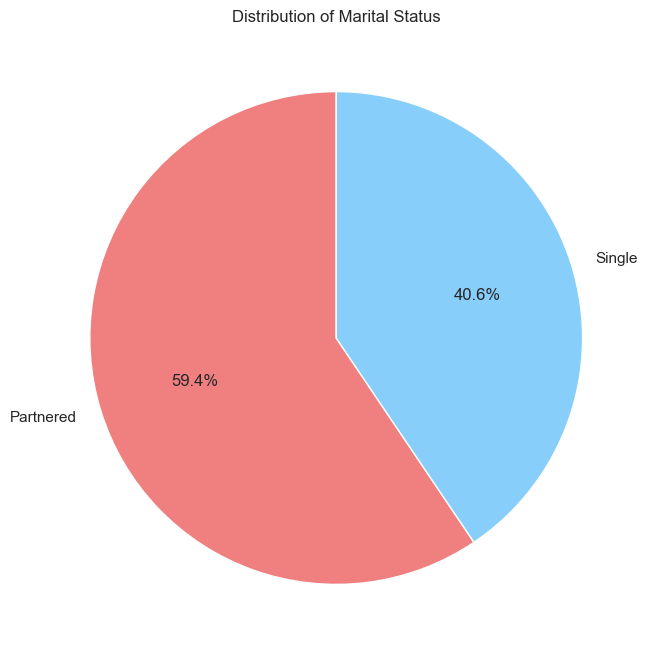

In [382]:
# Plotting the pie chart for marital status distribution
plt.figure(figsize=(8, 8))
cardio['MaritalStatus'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=90)
plt.title('Distribution of Marital Status')
plt.ylabel('')
plt.show()


#### Observations

- The larger segment, colored in red, represents customers who are partnered, accounting for 59.4% of the total.
- The smaller segment, colored in blue, represents single customers, accounting for 40.6% of the total.


## Observations on Fitness

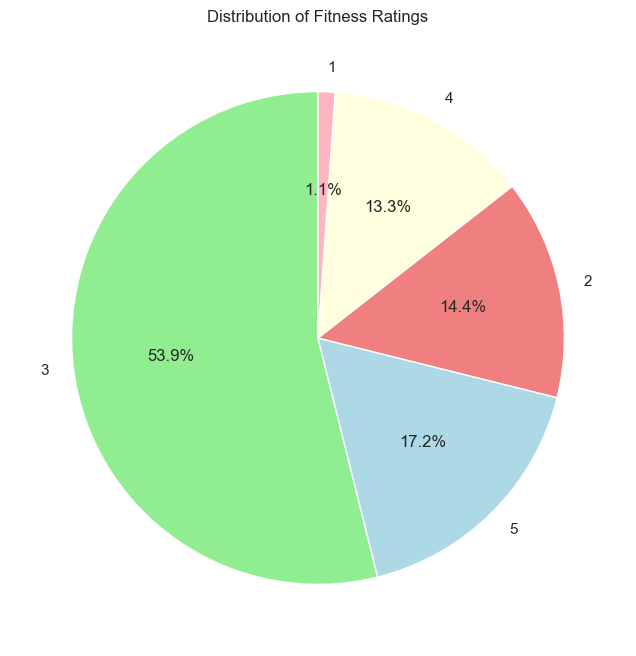

In [383]:
# Plotting the pie chart for fitness distribution
plt.figure(figsize=(8, 8))
cardio['Fitness'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral', 'lightyellow', 'lightpink'], startangle=90)
plt.title('Distribution of Fitness Ratings')
plt.ylabel('')
plt.show()


#### Observations

- Rating 1: A very small segment, almost negligible, indicating a very low percentage of customers chose this rating.
- Rating 2: A small segment, colored in red, representing 14.4% of the total.
- Rating 3: The largest segment, colored in green, representing 53.9% of the total.
- Rating 4: A moderate segment, colored in yellow, representing 13.3% of the total.
- Rating 5: A significant segment, colored in blue, representing 17.2% of the total.

## Observations on Education

* We saw earlier that years of education has a mean of 15.5 years of education, let's check what is the proportion of each level of education among our customer population.

* 47.2% of customers have 16 years of education, followed by 14 years of education(30.6%).

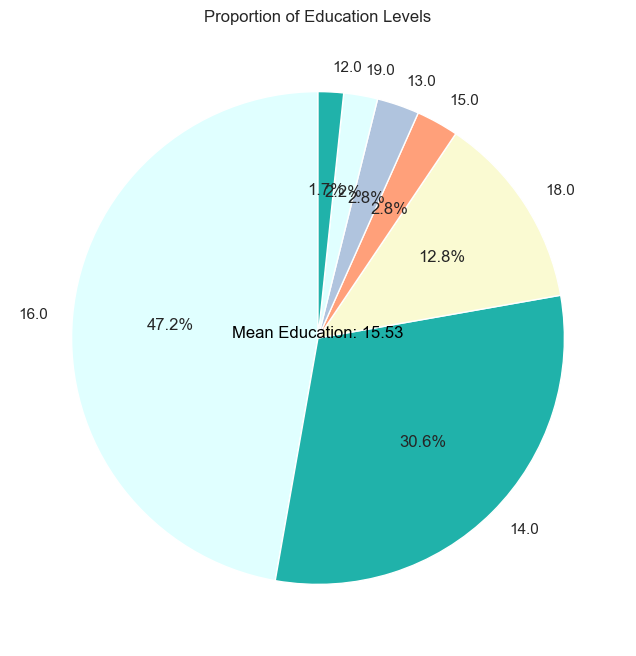

In [384]:
# Pie chart for education distribution with mean annotation
plt.figure(figsize=(8, 8))
education_counts = cardio['Education'].value_counts()
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcyan', 'lightseagreen', 'lightgoldenrodyellow', 'lightsalmon', 'lightsteelblue']
)
plt.title('Proportion of Education Levels')
# Annotate with mean education level
mean_education = cardio['Education'].mean()
plt.annotate(f'Mean Education: {mean_education:.2f}', xy=(0.5, 0.5), xytext=(0, 0), ha='center', fontsize=12, color='black')

plt.show()



#### Observations

- A large teal segment represents 47.2% of individuals with 16 years of education.
- A green segment represents 30.6% of individuals with 14 years of education.
- A yellow segment represents 12.8% of individuals with 18 years of education.
- A red segment represents 2.8% of individuals with 20 years of education.
- A blue segment represents 2.8% of individuals with 21 years of education.
- A light blue segment represents 1.7% of individuals with 22 years of education.
- A purple segment represents 2.2% of individuals with 24 years of education.
- In the center of the pie chart, a label states "Mean Education: 15.53," indicating that the average education level among the individuals is approximately 15.53 years.

## Observations on Usage

* We saw earlier that customers wish to use products for 3-4 days in a week, let's check what is the proportion of each level of usage among our customer population.

* 38.3% of customers wish to use the product 3 times a week followed by 28.9% customers who wish to use the product 4 times a week.

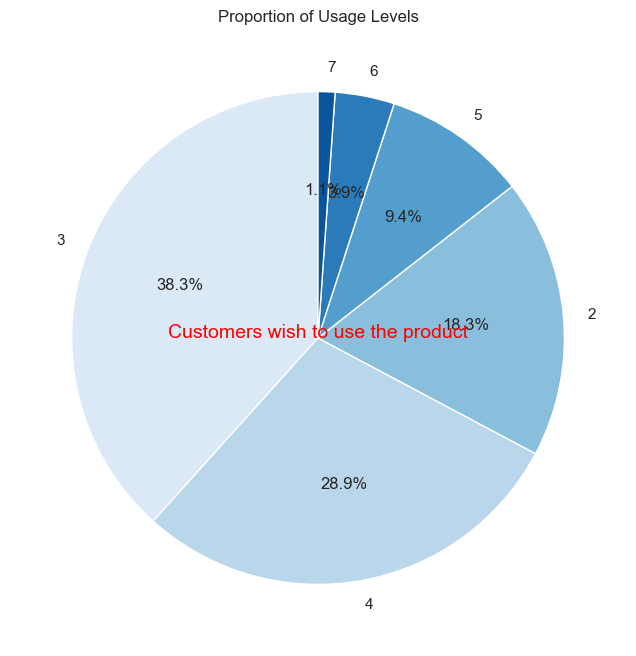

In [385]:
# Pie chart for usage distribution
plt.figure(figsize=(8, 8))
usage_counts = cardio['Usage'].value_counts()
plt.pie(usage_counts, labels=usage_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues'))
plt.title('Proportion of Usage Levels')
plt.annotate('Customers wish to use the product', xy=(0.5, 1.0), xytext=(0, 0), ha='center', fontsize=14, color='red')
plt.show()



#### Observations

- The largest segment, representing 38.3% of customers, wish to use the product 3 times.
- The next segment shows that 28.9% of customers wish to use the product 4 times.
- Following that, 18.3% of customers wish to use the product 2 times.
- A smaller segment of 9.4% of customers wish to use the product 5 times.
- The smallest segments show that 1.9% of customers wish to use the product 7 times, and another 1.9% wish to use the product 6 times.
- In the center of the pie chart, there is a label stating "Customers wish to use the product," which emphasizes the focus of the chart on customers' usage intentions.

## Bivariate Analysis

#### Correlation Analysis

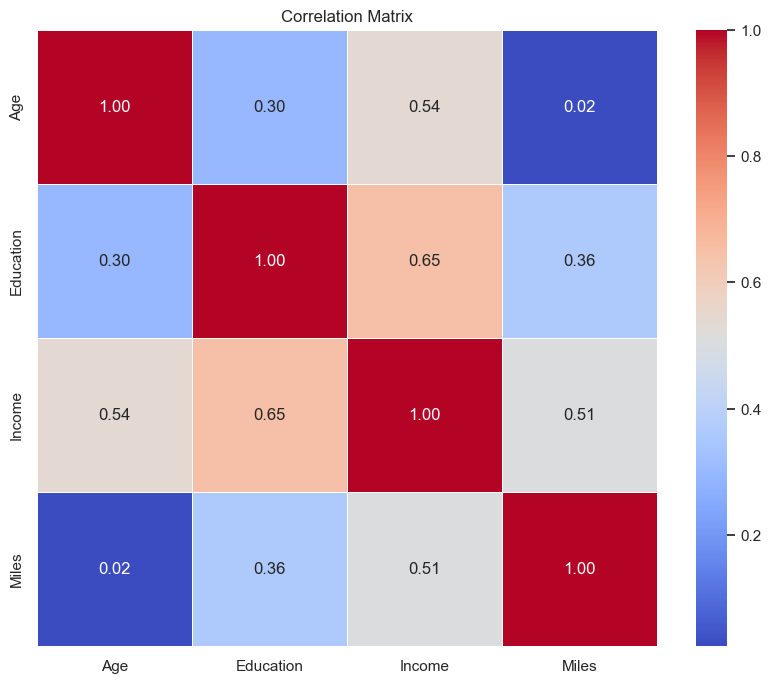

In [386]:
#Corelation Matrix
correlation_matrix = cardio.select_dtypes(exclude='category').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


1. Miles is highly correlated with Income, a customer running more miles would mean he is also earning more and is no longer starting their career. They have more time for fitness at home. 

2. Education and Income has a positive correlation, indicating more the persons education higher is the income.

3. Income shows a positive correlation with Age. Older you are more successful you are in your career. That means that higher is your income.



### Product vs Age

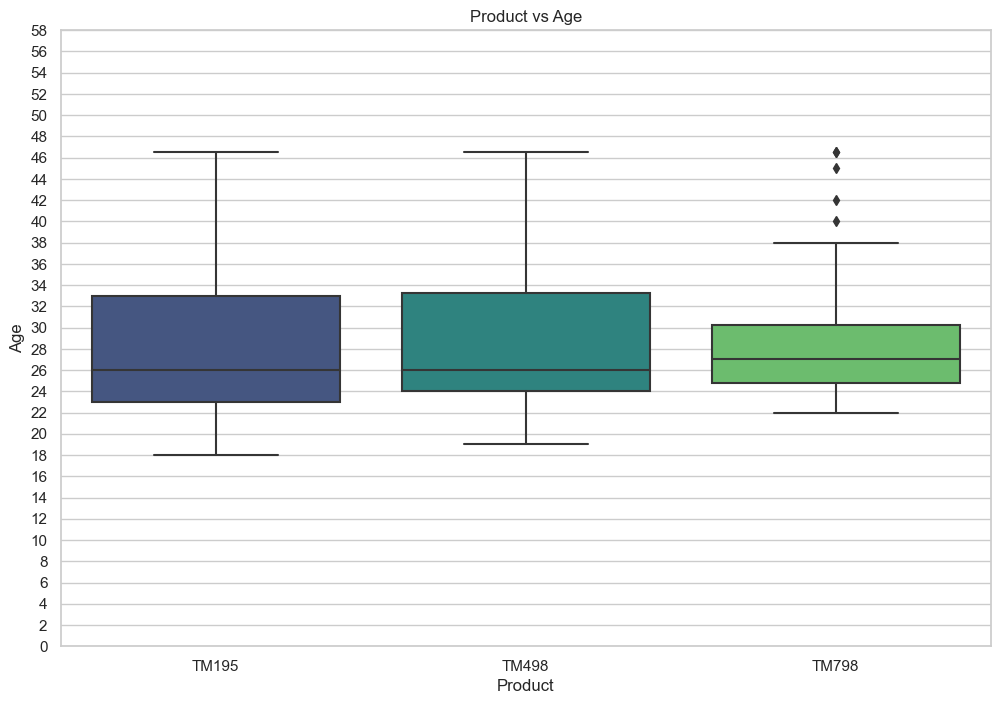

In [387]:
#Product vs age
plt.figure(figsize=(12, 8))
sns.boxplot(x='Product', y='Age', data=cardio, palette='viridis')
plt.yticks(range(0, 60, 2))
plt.title('Product vs Age')
plt.show()


#### Observations

- TM195: The boxplot shows a median age around the early 30s, with the interquartile range (IQR) spanning from the mid-20s to the late 30s. The whiskers extend from approximately 20 to 50 years old, indicating the full range of customer ages for this product.

- TM498: This boxplot also has a median age in the early 30s, with a similar IQR to TM195. The age range for this product's customers is slightly narrower, with whiskers extending from the early 20s to just under 50 years old.

- TM798: The TM798 product has a noticeably different age distribution, with a higher median age around the mid-30s and a narrower IQR, indicating less variability in the age of its customers. The whiskers extend from the early 20s to the early 40s. There are also several outliers indicated by diamond shapes, suggesting there are a few customers significantly younger or older than the typical customer age range for this product.

- TM195 and TM498 are preferred by customers of all ages but for TM798 customers are in the range of above 22 and below 38 (but there are some outliers).

## Product vs Education

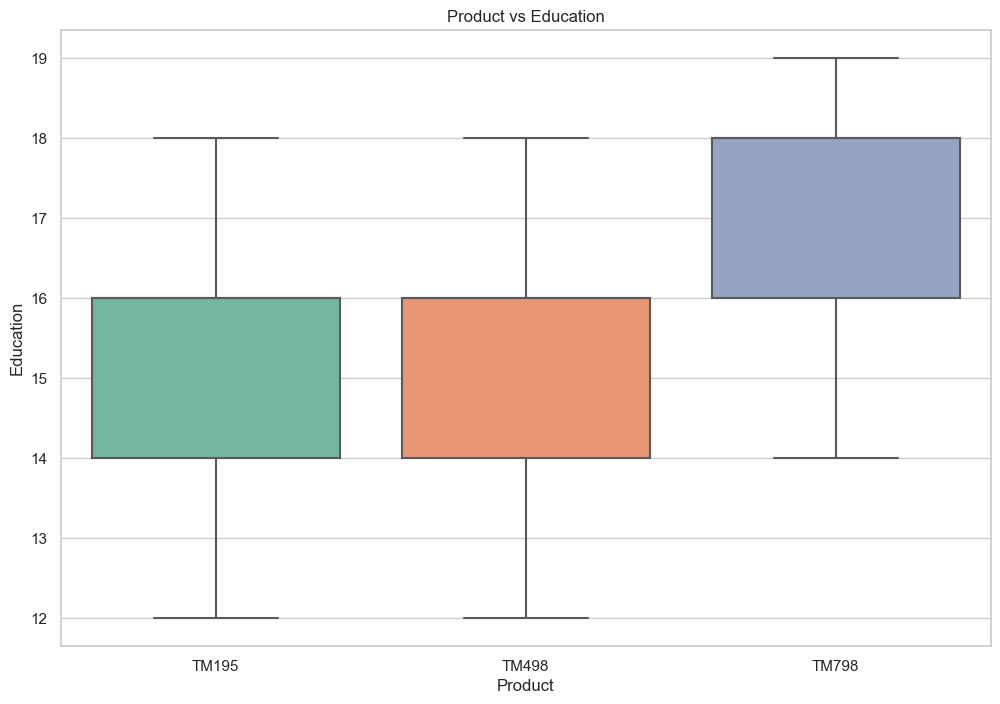

In [388]:
# Product vs Education
plt.figure(figsize=(12, 8))
sns.boxplot(x='Product', y='Education', data=cardio, palette='Set2')
plt.title('Product vs Education')
plt.show()

#### Observations

- TM195: The box plot for TM195 shows the median education level at 16 years. The interquartile range (IQR) spans from about 14 to 18 years, with the whiskers extending slightly beyond this range. There are no visible outliers.

- TM498: The TM498 box plot has a median education level slightly below 16 years. The IQR is narrower than TM195, indicating less variability in education level among customers of this product. The whiskers extend from about 14 to 18 years, similar to TM195, but with a more compact distribution.

- TM798: The box plot for TM798 shows a higher median education level, above 16 years, with an IQR that spans from about 16 to 18 years. The whiskers do not extend as far as the other products, indicating that customers of TM798 have a higher and more concentrated distribution of education levels. There are no visible outliers for this product either.

## Product vs Usage

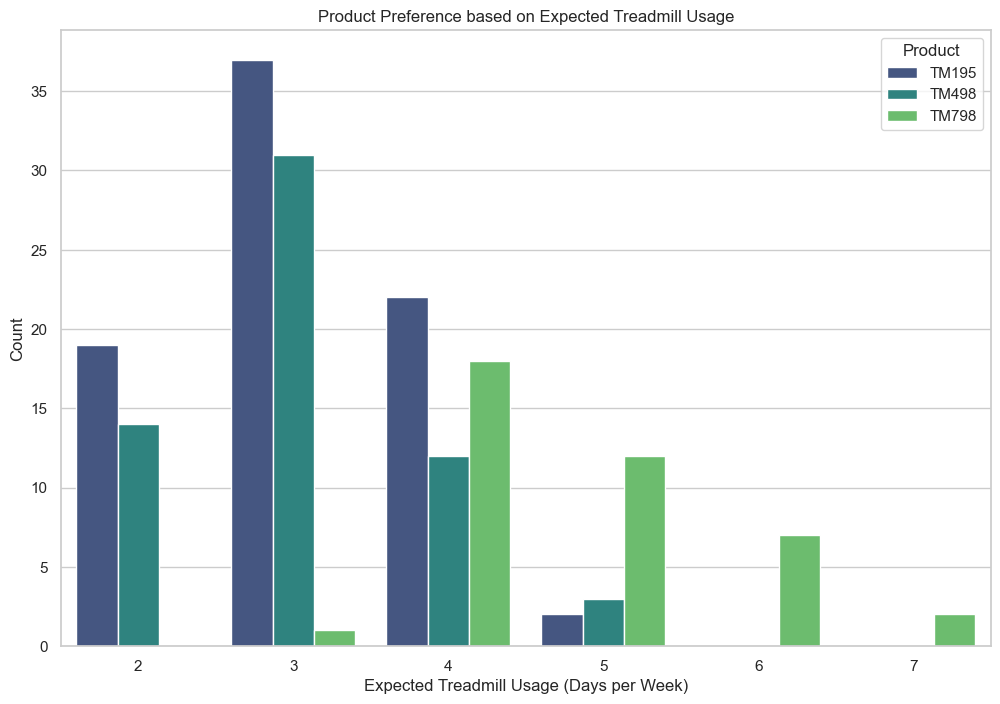

In [389]:
# Product vs Usage
plt.figure(figsize=(12, 8))
sns.countplot(x='Usage', hue='Product', data=cardio, palette='viridis')
plt.title('Product Preference based on Expected Treadmill Usage')
plt.xlabel('Expected Treadmill Usage (Days per Week)')
plt.ylabel('Count')
plt.legend(title='Product')
plt.show()


#### Observations

- TM195 (Blue): This product has the highest count across most usage categories, peaking at 3 days per week with over 30 customers expecting to use it that often. It also has a significant count at 4 and 5 days per week, but fewer for 2 and 6 days, and very few for 7 days.

- TM498 (Orange): This product shows a preference peaking at 3 days per week with around 15 customers, and a moderate count at 4 and 5 days per week. Similar to TM195, there are fewer customers expecting to use it for 2, 6, and 7 days per week.

- TM798 (Green): The preference for this product is lower compared to the other two, with its highest count at 4 days per week with around 10 customers. It has a smaller presence at 3 and 5 days per week and very few for 2, 6, and 7 days.
- Customers who have higher expected treadmill usage(greater than 3 days) prefer the TM798 product, Customers with very light(2-3 days) usage prefer TM498, customers who have moderate usage (greater than 2 days but less than or equal to 5 days) prefer TM195.

## Product vs Income

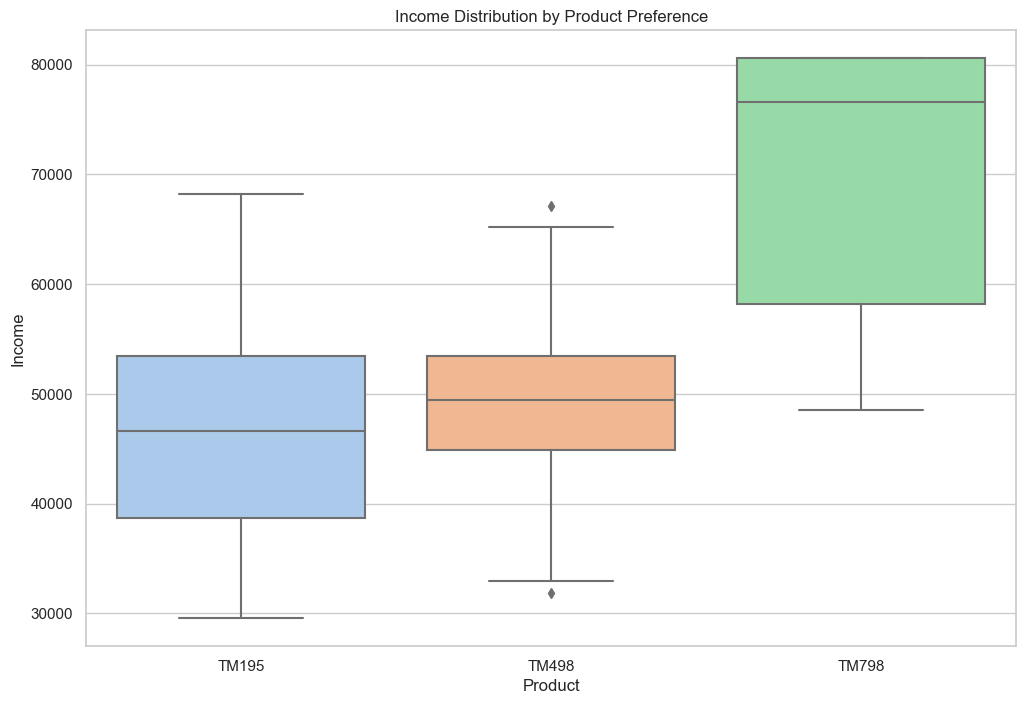

In [390]:
#Product vs Income
plt.figure(figsize=(12, 8))
sns.boxplot(x='Product', y='Income', data=cardio, palette='pastel')
plt.title('Income Distribution by Product Preference')
plt.xlabel('Product')
plt.ylabel('Income')
plt.show()


#### Observations

- TM195 (Blue Box): The median income for this product is around 50,000. The interquartile range (IQR) spans from approximately 45,000 to 55,000. The whiskers extend from about 35,000 to 70,000, indicating the full range of customer incomes for this product. There are no visible outliers.

- TM498 (Orange Box): The median income for TM498 is slightly lower than TM195, just below 50,000. The IQR is similar, from around 45,000 to 55,000. The whiskers extend from about 35,000 to 60,000, with one outlier noted above 70,000.

- TM798 (Green Box): The TM798 product shows a significantly higher median income, above 70,000. The IQR is also larger, spanning from about 65,000 to 80,000. The whiskers extend from around 60,000 to 85,000, indicating a higher income range for customers of this product. There are no visible outliers for TM798.
- Customers with higher income prefer TM798, whereas TM195 and TM498 are prefered by middle income customers.

## Product vs Miles

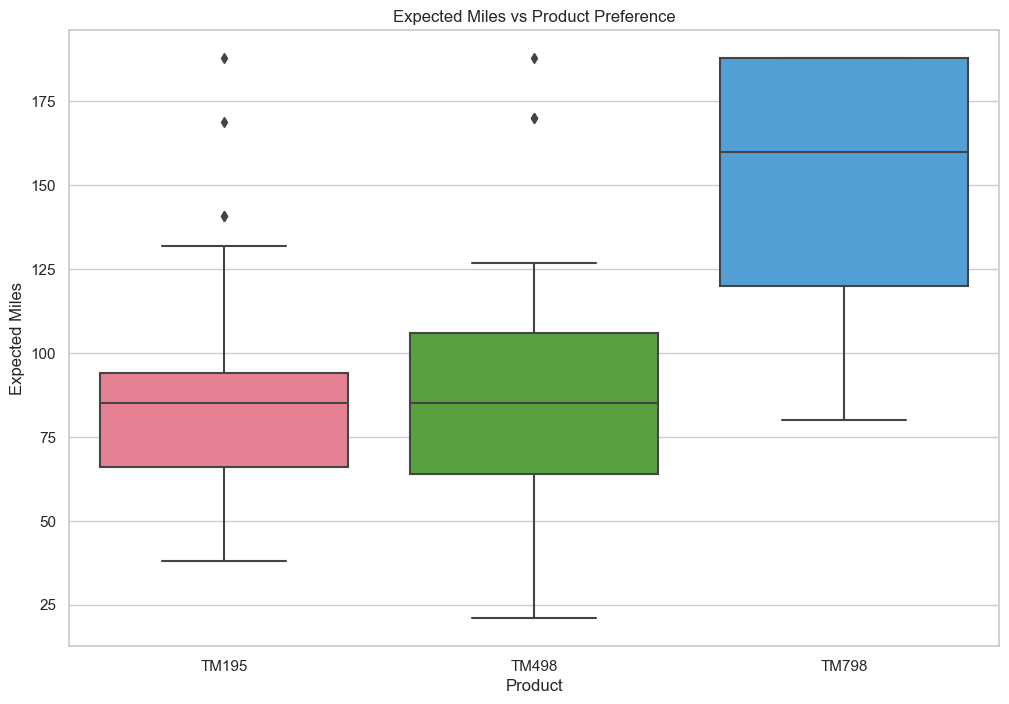

In [391]:
#Product vs Miles
plt.figure(figsize=(12, 8))
sns.boxplot(x='Product', y='Miles', data=cardio, palette='husl')
plt.title('Expected Miles vs Product Preference')
plt.xlabel('Product')
plt.ylabel('Expected Miles')
plt.show()


#### Observations

- TM195 (Pink Box): The median expected miles for this product is around 80 miles. The interquartile range (IQR) spans from approximately 60 to 100 miles. The whiskers extend from about 40 to 140 miles, indicating the full range of expected miles for this product. There are several outliers, with expected miles above 140.

- TM498 (Green Box): The median expected miles for TM498 is around 85 miles, slightly higher than TM195. The IQR is from about 70 to 100 miles. The whiskers extend from around 50 to 120 miles, with no visible outliers.

- TM798 (Blue Box): The TM798 product shows a higher median expected miles, around 160 miles. The IQR is also larger, spanning from about 120 to 200 miles. The whiskers extend from around 80 to 260 miles, indicating a wider range of expected miles for customers of this product. There are no visible outliers for TM798.

## Product vs Gender

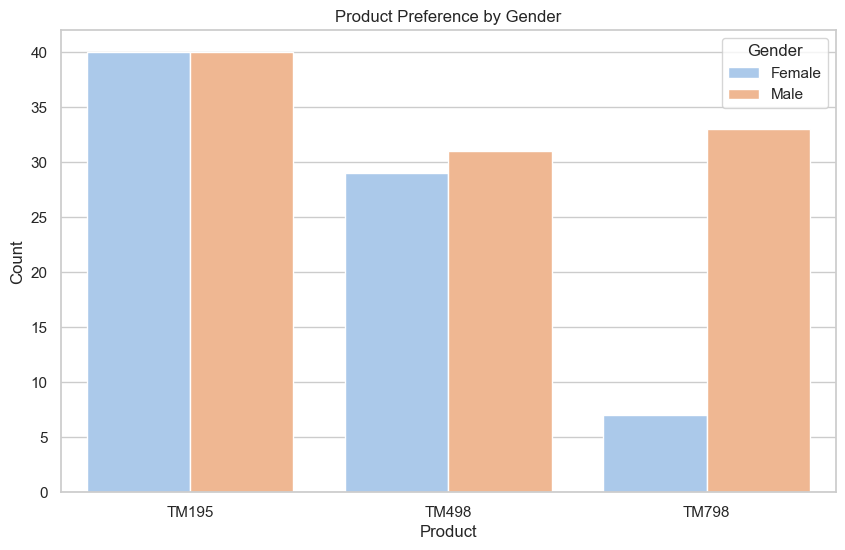

In [392]:
#Product vs Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Product', hue='Gender', data= cardio, palette='pastel')
plt.title('Product Preference by Gender')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()


#### Obesrvations

- The graph is a clustered bar chart titled "Product Preference by Gender". It shows the count of male and female customers who prefer each of three different products: TM195, TM498, and TM798.

- For TM195, there are approximately 40 male customers and 35 female customers.
- For TM498, the count is around 30 for both male and female customers.
- For TM798, there are about 40 male customers and significantly fewer female customers, approximately 10.

## Product vs Marital Status

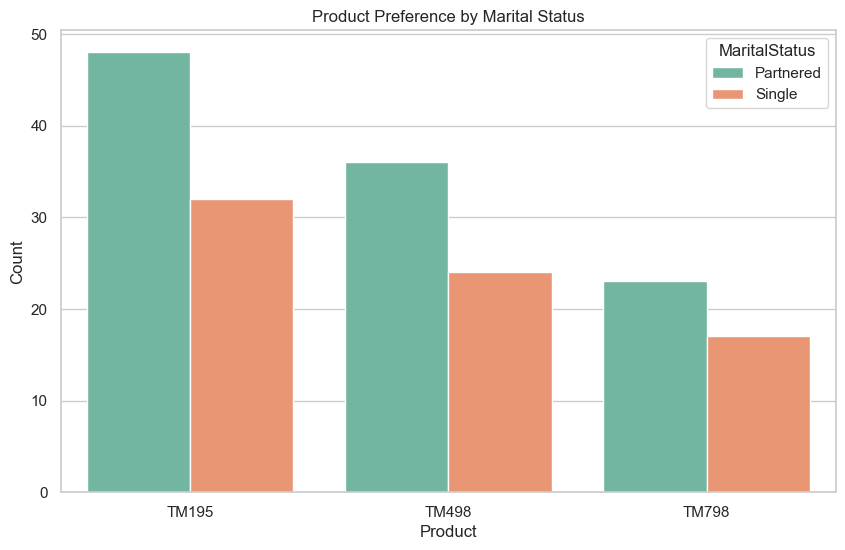

In [393]:
#Product vs Marital status
plt.figure(figsize=(10, 6))
sns.countplot(x='Product', hue='MaritalStatus', data=cardio, palette='Set2')
plt.title('Product Preference by Marital Status')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()


#### Observations

- All the products are couple/partner friendly.
- Couples/partnered customers have a higher chance of buying a product when compared to single customers.
- For TM195, there are over 40 partnered customers and around 30 single customers.
- For TM498, the count is close to 30 for partnered customers and slightly above 20 for single customers.
- For TM798, there are around 30 partnered customers and fewer than 20 single customers.

## Product vs Fitness

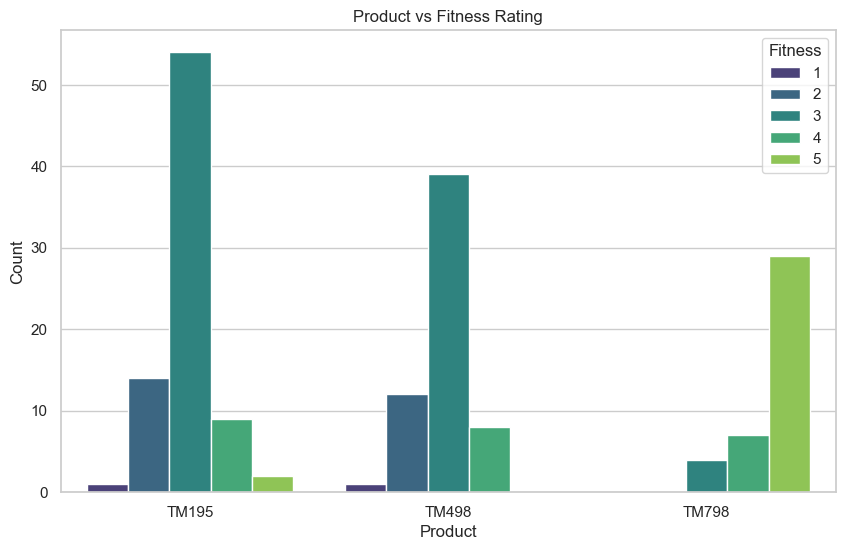

In [394]:
#Product vs Fitness
plt.figure(figsize=(10, 6))
sns.countplot(x='Product', hue='Fitness', data=cardio, palette='viridis')
plt.title('Product vs Fitness Rating')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()


#### Observations

- TM195: The majority of customers rated their fitness level as 3, with smaller counts for levels 2, 4, and 5, and the least count for level 1.

- TM498: Similar to TM195, the highest count of customers rated their fitness level as 3, with fewer customers rating themselves as levels 2, 4, and 5, and the least for level 1.

- TM798: This product shows a different pattern, with the majority of customers rating their fitness level as 5, indicating a perception of high fitness. There are very few customers who rated themselves as levels 1, 2, or 3, and a moderate count for level 4.

- Customers who purchased TM195 and TM498 gave themselves a balanced fitness rating of 3 (on a scale of 5, 1 being the least fit and 5 being the most fit), but for TM798 most customers have rated themselves higher in fitness that is 5.
- Customers who purchased  TM195 and TM498 gave themselves a balanced fitness rating of 3  (on a scale of 5, 1 being the least fit and 5 being the most fit), but for TM798 most of customers have rated themselves higher in fitness that is 5.

### Grouping data w.r.t to products to build customer profiles

In [395]:
cardio.Usage = cardio.Usage.astype('float64')

In [396]:
cardio[cardio.Product == 'TM195'].describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,80,80.000000,80,80.000000,80,80.000000,80.0,80.00000,80.000000
unique,1,NaN,2,NaN,2,NaN,5.0,NaN,NaN
top,TM195,NaN,Female,NaN,Partnered,NaN,3.0,NaN,NaN
freq,80,NaN,40,NaN,48,NaN,54.0,NaN,NaN
mean,NaN,28.500000,NaN,15.037500,NaN,3.087500,NaN,46418.02500,82.785938
std,NaN,7.083141,NaN,1.216383,NaN,0.782624,NaN,9075.78319,28.868339
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,NaN,29562.00000,38.000000
25%,NaN,23.000000,NaN,14.000000,NaN,3.000000,NaN,38658.00000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,NaN,46617.00000,85.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,NaN,53439.00000,94.000000


In [397]:
cardio[cardio.Product == 'TM498'].describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,60,60.000000,60,60.000000,60,60.000000,60.0,60.000000,60.000000
unique,1,NaN,2,NaN,2,NaN,4.0,NaN,NaN
top,TM498,NaN,Male,NaN,Partnered,NaN,3.0,NaN,NaN
freq,60,NaN,31,NaN,36,NaN,39.0,NaN,NaN
mean,NaN,28.875000,NaN,15.116667,NaN,3.066667,NaN,48973.650000,87.531250
std,NaN,6.574621,NaN,1.222552,NaN,0.799717,NaN,8653.989388,31.853966
min,NaN,19.000000,NaN,12.000000,NaN,2.000000,NaN,31836.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,NaN,44911.500000,64.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,NaN,49459.500000,85.000000
75%,NaN,33.250000,NaN,16.000000,NaN,3.250000,NaN,53439.000000,106.000000


In [398]:
cardio[cardio.Product == 'TM798'].describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,40,40.000000,40,40.000000,40,40.000000,40.0,40.000000,40.000000
unique,1,NaN,2,NaN,2,NaN,3.0,NaN,NaN
top,TM798,NaN,Male,NaN,Partnered,NaN,5.0,NaN,NaN
freq,40,NaN,33,NaN,23,NaN,29.0,NaN,NaN
mean,NaN,29.050000,NaN,17.150000,NaN,4.775000,NaN,69684.565625,152.565625
std,NaN,6.837678,NaN,1.311683,NaN,0.946993,NaN,12532.931739,35.428648
min,NaN,22.000000,NaN,14.000000,NaN,3.000000,NaN,48556.000000,80.000000
25%,NaN,24.750000,NaN,16.000000,NaN,4.000000,NaN,58204.750000,120.000000
50%,NaN,27.000000,NaN,18.000000,NaN,5.000000,NaN,76568.500000,160.000000
75%,NaN,30.250000,NaN,18.000000,NaN,5.000000,NaN,80581.875000,187.875000


## Customer Profiles

### TM195 Customer

Customers buying TM195 product are regular customers. As this product is sold the most. 
1. Customers that buy this product are in their Early 20s to early 30s
2. 12-18 years of educataion with Income between 40K and 50K
3. Plans to use treadmill three to four times per week for light usage.
4. Has an average fitness level

### TM498 Customer

1. These customers have slightly higher annual income thatn TM 195
2. Their usage is less and has more miles to run every week.
3. Adult in their mid 20’s to early 30’s
4. Similar number of years of education
5. More income around 50K
6. Has an average fitness level.

### TM798 Customer

1. Generally preferred by Males over females
2. Generally in late 20’s
3. Highly Educated
4. Higher income earner
5. Plans to use treadmill more times of the week.
6. Considers themselves very fit.

### Customer Segmentation

This will help us to understand and cater needs of customers better based on their gender,marital status, Age etc.

## Usage vs Gender vs Marital Status

<Figure size 1200x600 with 0 Axes>

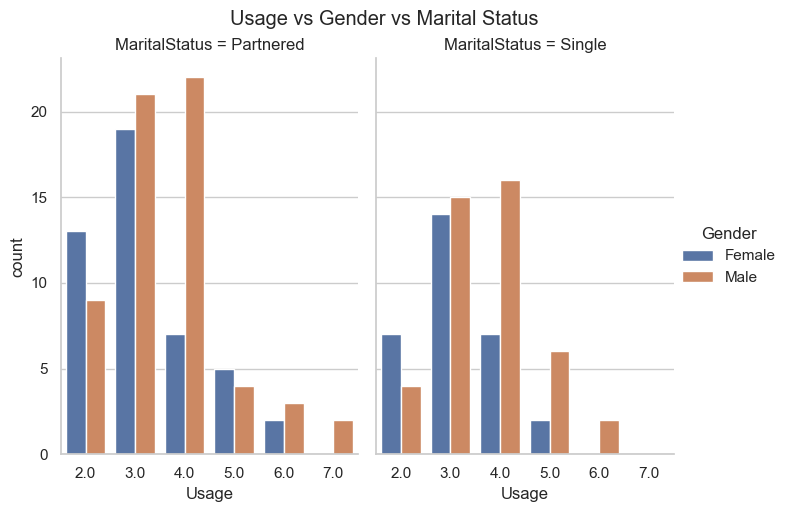

In [399]:
#Usage vs Gender vs Marital status
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.catplot(x='Usage', hue='Gender', col='MaritalStatus', data=cardio, kind='count', height=5, aspect=0.7)
plt.suptitle('Usage vs Gender vs Marital Status', y=1.02)
plt.show()


1. Usage for single individuals are less than partnered, meaning in a marriage couples can motivate eachother to run

2. Partnered males have more usage than single men

## Gender vs Income

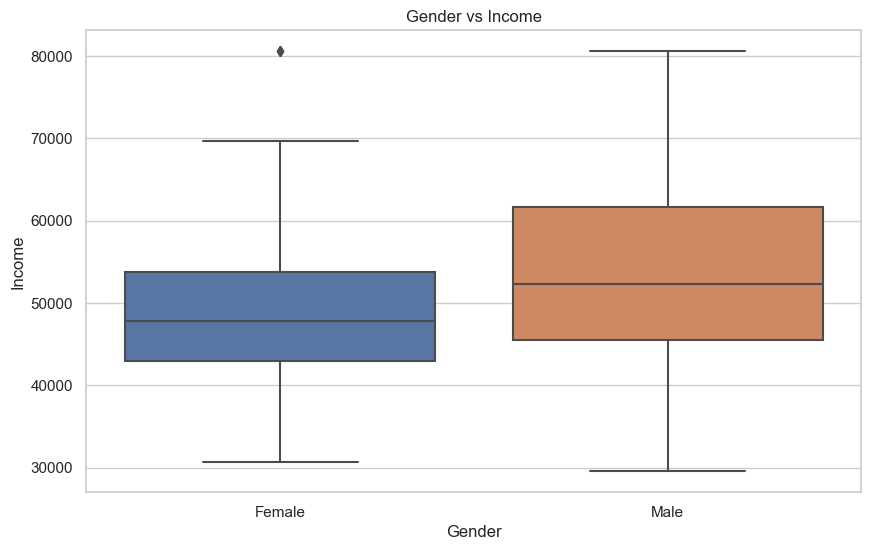

In [400]:
#Gender vs Income
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Income', data=cardio)
plt.title('Gender vs Income')
plt.show()


1. There is a slight difference in income of both the genders
2. There are more males with higher income than females

## Gender vs Income vs Marital Status

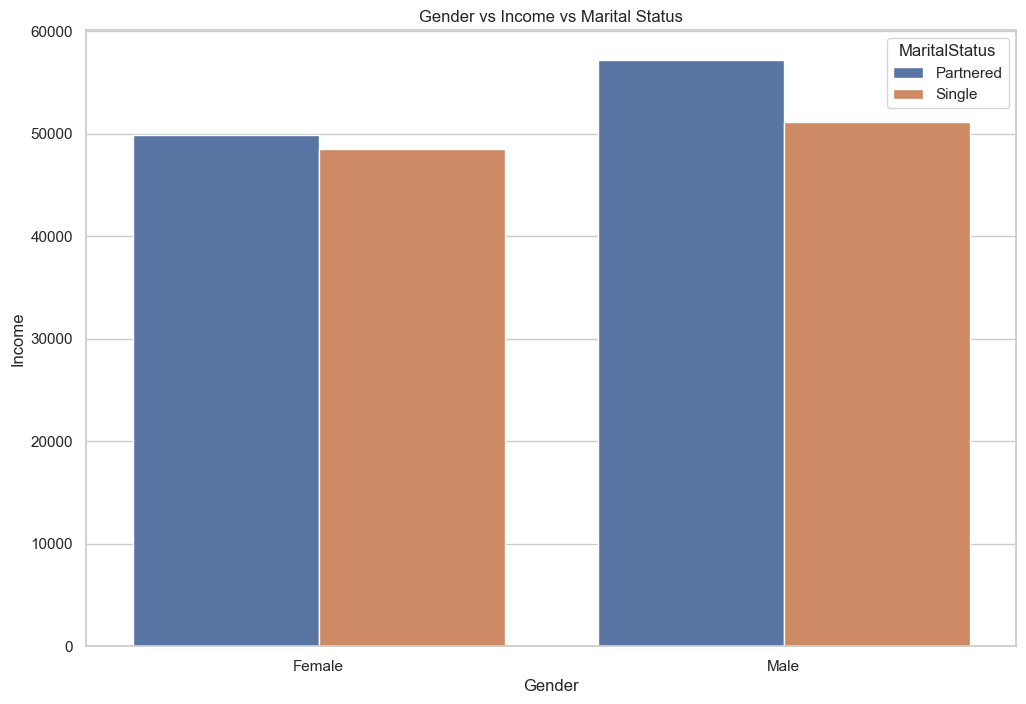

In [401]:
#Gender vs Income vs Marital Status
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='Gender', y='Income', hue='MaritalStatus', data=cardio, ci=None)
plt.title('Gender vs Income vs Marital Status')
plt.show()


1. Married men have a higher income than single men

2. Married and single women have similar income


## Gender vs Miles

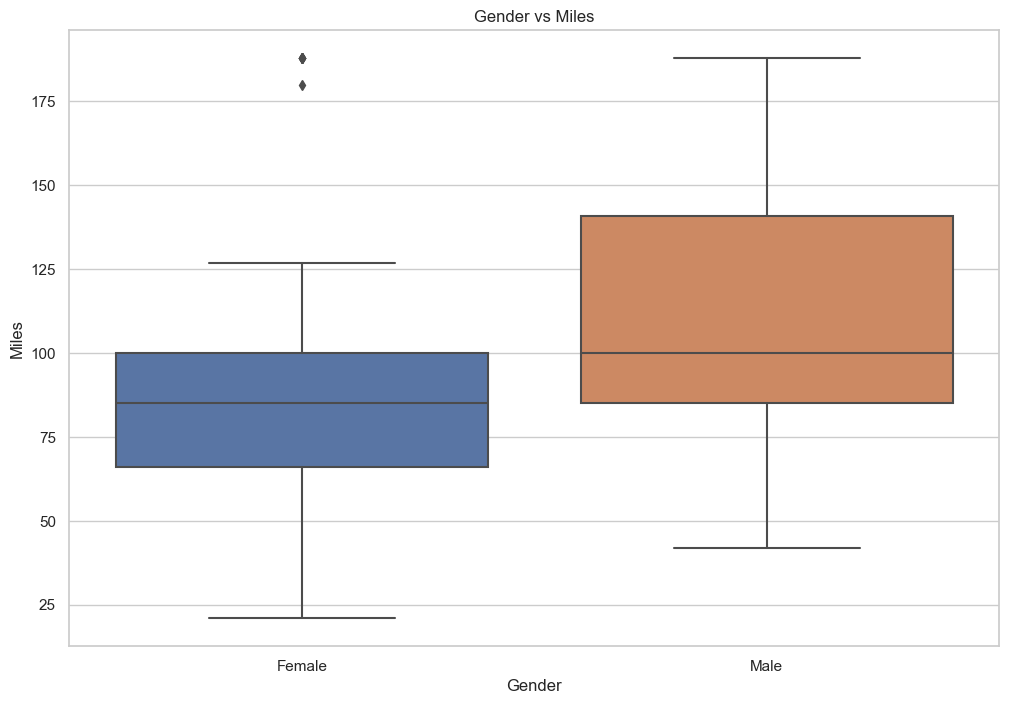

In [402]:
#Gender vs Miles
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(x='Gender', y='Miles', data=cardio)
plt.title('Gender vs Miles')
plt.show()


1. Males run more than females

## Gender vs Miles vs Marital Status

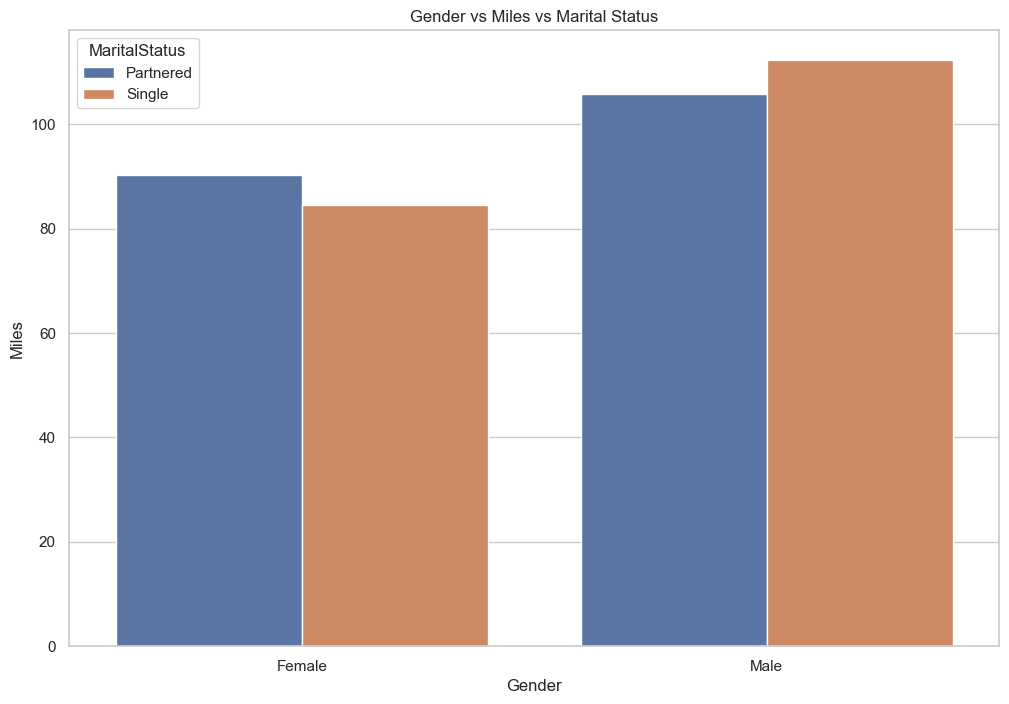

In [403]:
#Gender vs Miles vs Marital Status
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='Gender', y='Miles', hue='MaritalStatus', data=cardio, ci=None)
plt.title('Gender vs Miles vs Marital Status')
plt.show()



1. There are more single men 

2. There are more partnered women

3. Single and Partnered males run more, than Single or Partnered females.

## Gender vs Miles vs Education

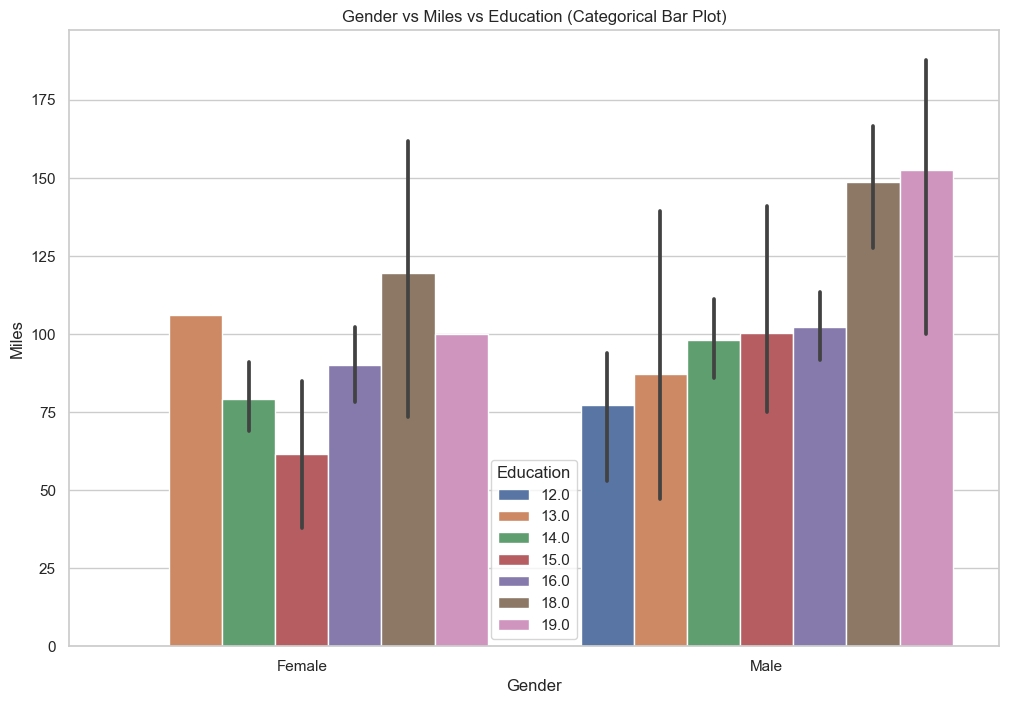

In [404]:
#Gnder vs Miles vs Education
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='Gender', y='Miles', hue='Education', data=cardio)
plt.title('Gender vs Miles vs Education (Categorical Bar Plot)')
plt.show()


1. Men are more educated than women

2. The more educated you become the stronger is your fitness commitment.

3. Educated customers prioritize their health



## Age vs Miles vs Gender

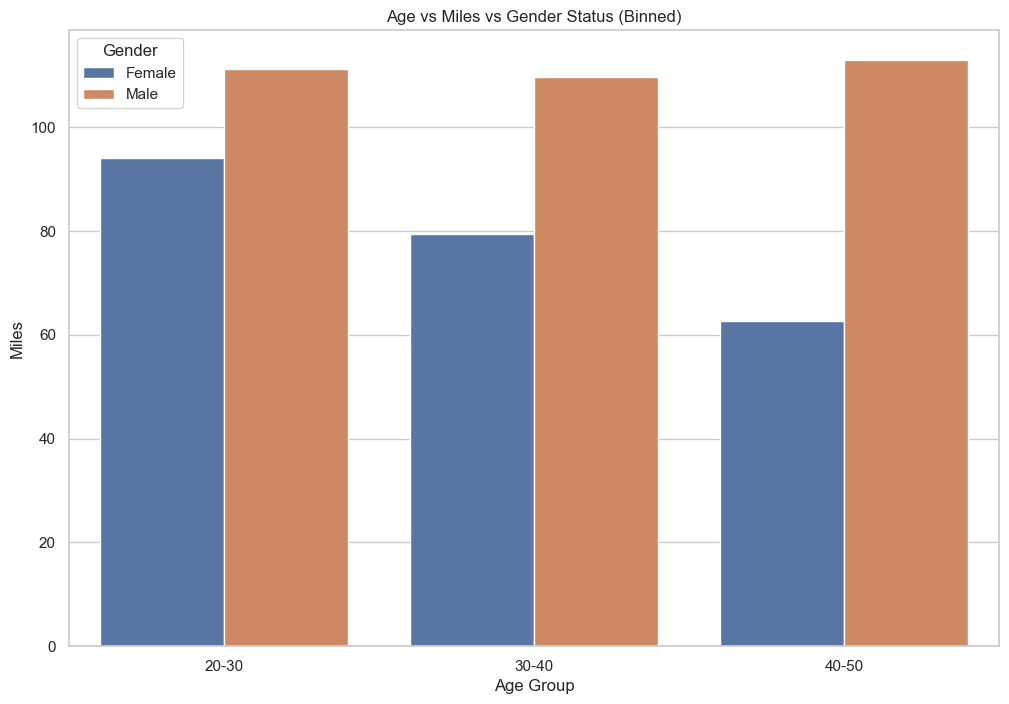

In [405]:
# Age vs Miles vs Gender
cardio['AgeGroup'] = pd.cut(cardio['Age'], bins=[20, 30, 40, 50], labels=['20-30', '30-40', '40-50'])
plt.figure(figsize=(12, 8))
sns.barplot(x='AgeGroup', y='Miles', hue='Gender', data=cardio, ci=None, dodge=True)
plt.title('Age vs Miles vs Gender Status (Binned)')
plt.xlabel('Age Group')
plt.ylabel('Miles')
plt.show()




1. Women as they grow older tends to care about fitness a lot lesser than men. 

2. In every age group men run more than women.


## Age vs Miles vs Marital Status

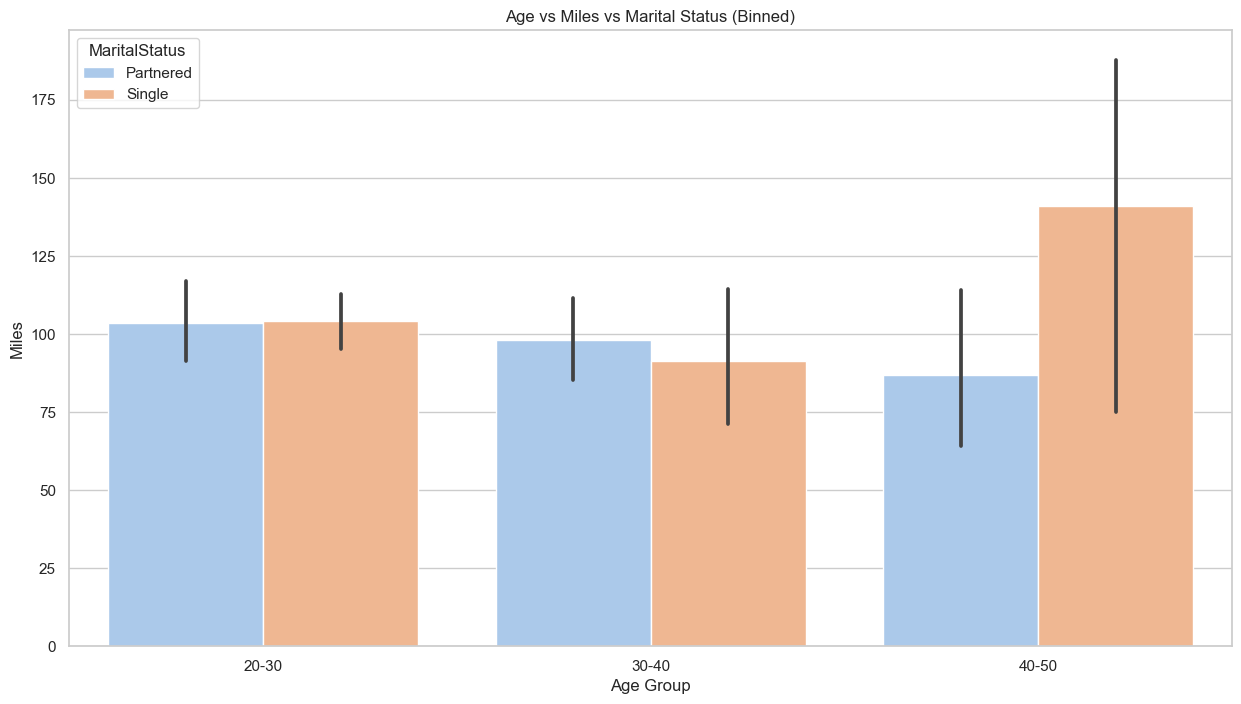

In [406]:
# Age vs Miles vs MaritalStatus
cardio['AgeGroup'] = pd.cut(cardio['Age'], bins=[20, 30, 40, 50], labels=['20-30', '30-40', '40-50'])
plt.figure(figsize=(15, 8))
sns.barplot(x='AgeGroup', y='Miles', hue='MaritalStatus', data=cardio, palette='pastel', dodge=True)
plt.title('Age vs Miles vs Marital Status (Binned)')
plt.xlabel('Age Group')
plt.ylabel('Miles')
plt.show()





1. Single individuals above 40 years are more health conscious than the others.



## Age vs Income vs Product

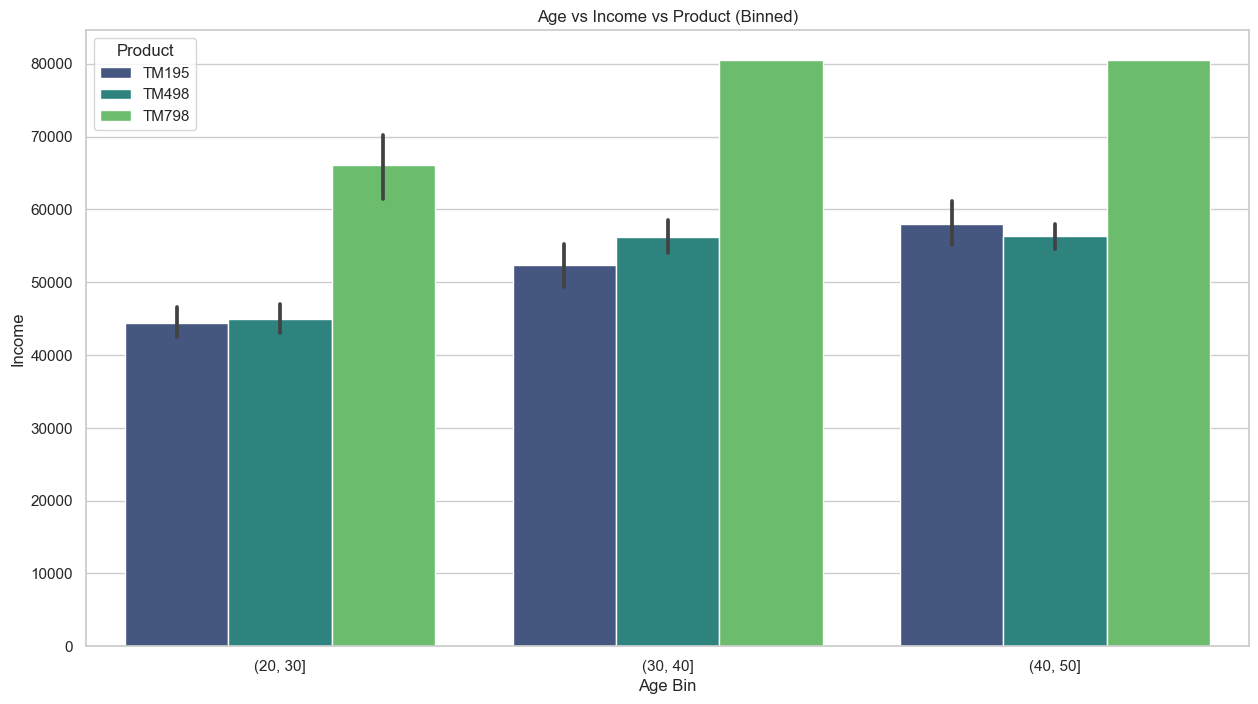

In [407]:
#Age vs Income vs Product
age_bins = [20, 30, 40, 50]
income_bins = [0, 30000, 50000, 70000, 90000, 110000, 130000]
# Create new columns 'AgeBin' and 'IncomeBin' based on binning
cardio['AgeBin'] = pd.cut(cardio['Age'], bins=age_bins)
cardio['IncomeBin'] = pd.cut(cardio['Income'], bins=income_bins)
plt.figure(figsize=(15, 8))
sns.barplot(x='AgeBin', y='Income', hue='Product', data=cardio, palette='viridis')
plt.title('Age vs Income vs Product (Binned)')
plt.xlabel('Age Bin')
plt.ylabel('Income')
plt.show()


1. Customers that buy TM195 and TM498 generally have similar income in their 20s. Later on their is some dispersion.

2. TM798 customers have the highest income in every age group


## Income vs Miles vs Education

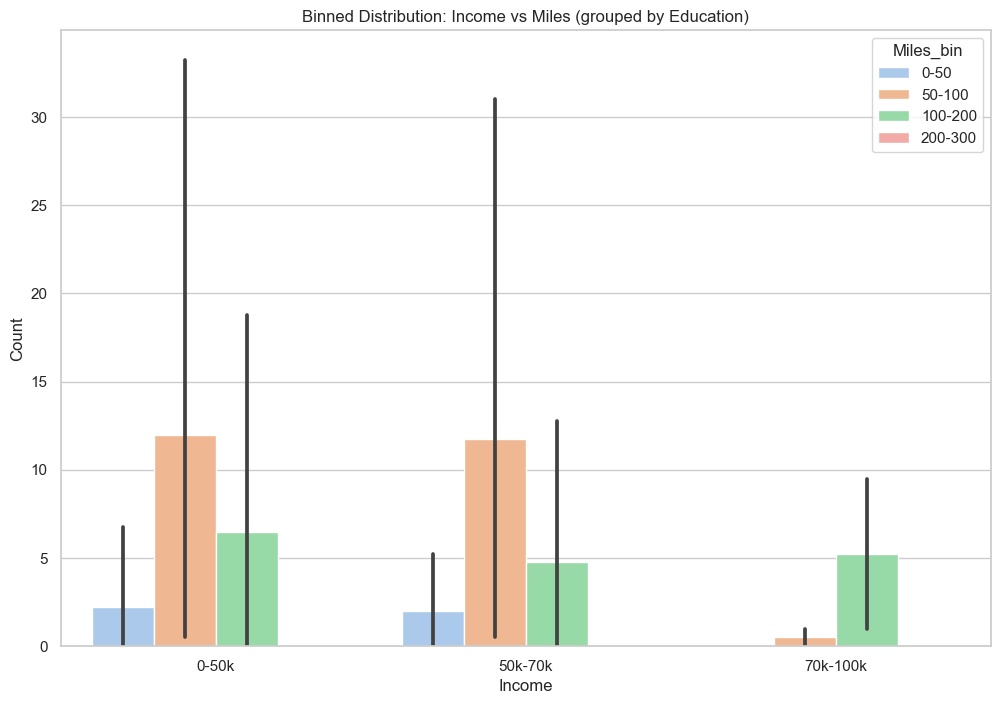

In [408]:

#  Income, Miles, and Education
income_bins = [0, 50000, 70000, 100000]
mile_bins = [0, 50, 100, 200, 300]
education_bins = [0, 12, 16, 18, 21]

# Assigning bins to DataFrame
cardio['Income_bin'] = pd.cut(cardio['Income'], bins=income_bins, labels=['0-50k', '50k-70k', '70k-100k'])
cardio['Miles_bin'] = pd.cut(cardio['Miles'], bins=mile_bins, labels=['0-50', '50-100', '100-200', '200-300'])
cardio['Education_bin'] = pd.cut(cardio['Education'], bins=education_bins, labels=['0-12', '12-16', '16-18', '18-21'])

# Count the occurrences in each bin
bin_counts = cardio.groupby(['Income_bin', 'Miles_bin', 'Education_bin']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Income_bin', y='Count', hue='Miles_bin', data=bin_counts, palette='pastel')

plt.title('Binned Distribution: Income vs Miles (grouped by Education)')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


## Income vs Miles vs Product

In [409]:
#Income vs Miles vs Product
import plotly.express as px
fig = px.area(cardio, x='Income', y='Miles', color='Product', title='Income vs Miles vs Product',
              labels={'Income': 'Income', 'Miles': 'Miles'},
              category_orders={'Product': ['TM195', 'TM498', 'TM798']},
              color_discrete_map={'TM195': 'blue', 'TM498': 'green', 'TM798': 'purple'},
              template='plotly_white')

fig.show()


1. Higher income individuals tend to buy TM798 more than the other types of customers

2. These individuals are also very health conscious

## Conclusion

### Key insights

#### TM195:

1. More affordable treadmill for those starting on their fitness journeys

2. More for younger audiences with a budget constraint

3. Customers that will use the treadmill 3 to 4 times a week is good for this product.


#### TM495:

1. A bit more on the expensive side than TM195 as it has more features.

2. The product targets the same age group as the TM195 but these customers are more successful and have a higher income.

3. Generally, this treadmill is used 3 times a wekk 


#### TM798:

1. One of the best treadmills with more features and is generally used by those that take their fitness seriously.

2. Has a higher market price 

3. The users of this product are very health conscious. They run for more miles in a week

4. The customers are more educated, have a higher income and take their fitness very seriously.

5. Male customers prefer this product more than females

### Business Recommendations

1. Increase the advertising for their most affordable and most sold product the TM195. It is their main product that brings the most profit to the company.

2. Cater to more female customers. As women take fitness seriously as well. This is an untapped potential of revenue. Especially for TM798. 

3. Focus on spreading the word of treadmills to younger age groups. And also look into more financially cheaper options for those individuals not working. 

4. Segment the customers based on education. More the education, higher the income and these customers can be recommended the most expensive model TM798.

5. Above 40 years individuals can be recommended the most expensive product as age is positively correlated with income. 

6. Advertise the best treadmill with the most features in sports events as the customers most likely to buy these products will be present in these environments.